# Telecom Churn Case study 

### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Business objective
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


### Important definitions

Churn definition : Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

High Value customers : High value means recharge amount (RECH) > 70th percentile. in the first two phase. 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Telecom-Churn-Case-study" data-toc-modified-id="Telecom-Churn-Case-study-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Telecom Churn Case study</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Business-problem-overview" data-toc-modified-id="Business-problem-overview-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Business problem overview</a></span></li><li><span><a href="#Business-objective" data-toc-modified-id="Business-objective-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Business objective</a></span></li><li><span><a href="#Important-definitions" data-toc-modified-id="Important-definitions-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Important definitions</a></span></li></ul></li></ul></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Reading-the-data" data-toc-modified-id="Reading-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading the data</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Data-cleaning-and-manipulation" data-toc-modified-id="Data-cleaning-and-manipulation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data cleaning and manipulation</a></span><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Filtering-high-value-users" data-toc-modified-id="Filtering-high-value-users-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Filtering high value users</a></span></li><li><span><a href="#Churned-users-calculation" data-toc-modified-id="Churned-users-calculation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Churned users calculation</a></span></li><li><span><a href="#Dealing-with-negative-values" data-toc-modified-id="Dealing-with-negative-values-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Dealing with negative values</a></span></li><li><span><a href="#Removing-all-date-related-columns" data-toc-modified-id="Removing-all-date-related-columns-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Removing all date-related columns</a></span></li><li><span><a href="#Removing-columns-with-constant-variance-i.e.,-1-unique-value" data-toc-modified-id="Removing-columns-with-constant-variance-i.e.,-1-unique-value-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Removing columns with constant variance i.e., 1 unique value</a></span></li><li><span><a href="#Dropping-columns-that-are-represented-by-totals" data-toc-modified-id="Dropping-columns-that-are-represented-by-totals-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Dropping columns that are represented by totals</a></span></li><li><span><a href="#Null-value-imputation" data-toc-modified-id="Null-value-imputation-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Null value imputation</a></span></li><li><span><a href="#Variables---cat_col-and-num_col" data-toc-modified-id="Variables---cat_col-and-num_col-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Variables - cat_col and num_col</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Correlation analysis</a></span></li><li><span><a href="#Step-6:-Outlier-treatment" data-toc-modified-id="Step-6:-Outlier-treatment-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Step 6: Outlier treatment</a></span><ul class="toc-item"><li><span><a href="#6.1-Box-plots-for-numeric-variables" data-toc-modified-id="6.1-Box-plots-for-numeric-variables-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>6.1 Box plots for numeric variables</a></span></li></ul></li></ul></li><li><span><a href="#Derive-new-features" data-toc-modified-id="Derive-new-features-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Derive new features</a></span><ul class="toc-item"><li><span><a href="#Derive-tenure" data-toc-modified-id="Derive-tenure-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Derive tenure</a></span></li><li><span><a href="#Good-and-Action-variables" data-toc-modified-id="Good-and-Action-variables-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Good and Action variables</a></span></li></ul></li><li><span><a href="#Step-8:-Train-and-test-data-split" data-toc-modified-id="Step-8:-Train-and-test-data-split-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Step 8: Train and test data split</a></span><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Train-test split</a></span><ul class="toc-item"><li><span><a href="#8.2-Scaling-the-data" data-toc-modified-id="8.2-Scaling-the-data-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>8.2 Scaling the data</a></span></li></ul></li><li><span><a href="#Handling-data-imbalance-using-SMOTE" data-toc-modified-id="Handling-data-imbalance-using-SMOTE-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Handling data imbalance using SMOTE</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#RFE-and-manual-tuning-based-logistic-regression-(without-handling-class-imbalance)" data-toc-modified-id="RFE-and-manual-tuning-based-logistic-regression-(without-handling-class-imbalance)-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>RFE and manual tuning based logistic regression (without handling class imbalance)</a></span><ul class="toc-item"><li><span><a href="#9.1.2-Logistic-regression-on-balanced-data-(SMOTE-technique)-without-PCA" data-toc-modified-id="9.1.2-Logistic-regression-on-balanced-data-(SMOTE-technique)-without-PCA-9.1.1.1"><span class="toc-item-num">9.1.1.1&nbsp;&nbsp;</span>9.1.2 Logistic regression on balanced data (SMOTE technique) without PCA</a></span></li><li><span><a href="#9.1.3-Logistic-Regression-on-SMOTE-balanced-data-with-PCA" data-toc-modified-id="9.1.3-Logistic-Regression-on-SMOTE-balanced-data-with-PCA-9.1.1.2"><span class="toc-item-num">9.1.1.2&nbsp;&nbsp;</span>9.1.3 Logistic Regression on SMOTE balanced data with PCA</a></span></li></ul></li><li><span><a href="#9.2-Random-Forests" data-toc-modified-id="9.2-Random-Forests-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>9.2 Random Forests</a></span><ul class="toc-item"><li><span><a href="#9.2.1-Random-forest-with-SMOTE-and-default-parameters" data-toc-modified-id="9.2.1-Random-forest-with-SMOTE-and-default-parameters-9.1.2.1"><span class="toc-item-num">9.1.2.1&nbsp;&nbsp;</span>9.2.1 Random forest with SMOTE and default parameters</a></span></li><li><span><a href="#9.2.2-Random-forests-with-SMOTE-and-hyper-parameter-tuning" data-toc-modified-id="9.2.2-Random-forests-with-SMOTE-and-hyper-parameter-tuning-9.1.2.2"><span class="toc-item-num">9.1.2.2&nbsp;&nbsp;</span>9.2.2 Random forests with SMOTE and hyper parameter tuning</a></span></li></ul></li><li><span><a href="#9.3-XGBoost" data-toc-modified-id="9.3-XGBoost-9.1.3"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>9.3 XGBoost</a></span><ul class="toc-item"><li><span><a href="#9.3.1-XGBoost-with-SMOTE-on-default-parameters" data-toc-modified-id="9.3.1-XGBoost-with-SMOTE-on-default-parameters-9.1.3.1"><span class="toc-item-num">9.1.3.1&nbsp;&nbsp;</span>9.3.1 XGBoost with SMOTE on default parameters</a></span></li><li><span><a href="#9.3.2-XGBoost-with-SMOTE-and-hyperparameter-tuning" data-toc-modified-id="9.3.2-XGBoost-with-SMOTE-and-hyperparameter-tuning-9.1.3.2"><span class="toc-item-num">9.1.3.2&nbsp;&nbsp;</span>9.3.2 XGBoost with SMOTE and hyperparameter tuning</a></span></li></ul></li></ul></li><li><span><a href="#Step-10:-Summary" data-toc-modified-id="Step-10:-Summary-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Step 10: Summary</a></span><ul class="toc-item"><li><span><a href="#10.1-Model-finalization" data-toc-modified-id="10.1-Model-finalization-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>10.1 Model finalization</a></span></li><li><span><a href="#Step-10.2-Feature-importance" data-toc-modified-id="Step-10.2-Feature-importance-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Step 10.2 Feature importance</a></span></li><li><span><a href="#10.3-Business-recommendations" data-toc-modified-id="10.3-Business-recommendations-9.2.3"><span class="toc-item-num">9.2.3&nbsp;&nbsp;</span>10.3 Business recommendations</a></span></li></ul></li></ul></li></ul></div>

# Import libraries

In [1]:
# Packages for data manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, plot_roc_curve
from imblearn.over_sampling import SMOTE
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
from scipy.stats import skew, norm
from scipy import stats
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Full display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', -1)

# scaler

# modeling packages

# Stats


# imbalance handler

#  Reading the data

In [2]:
telecom_data = pd.read_csv('telecom_churn_data.csv')

In [ ]:
telecom_data.head(5)

In [3]:
print('Number of records :',telecom_data.shape[0])
print('Number of features :',telecom_data.shape[1])

Number of records : 99999
Number of features : 226


#  Explore the data

In [ ]:
# using info() to understand the data types of the columns
telecom_data.info(show_counts=True, verbose=True)

Observation:

1. There are 179 float columns, 35 integer columns and 12 object columns
2. Almost all the columns aare of integer type
3. Columns with "date" in them are of object type 

In [ ]:
# describe the data
telecom_data.describe().T

In [ ]:
# describe the object datatype
telecom_data.describe(include=['O']).T

Observation

last_date_of_month_7,last_date_of_month_8,last_date_of_month_9 have only 1 unique value and hence can be droped later

# Data cleaning and manipulation

**NOTE**

We first create a dataset that only includes the high value customers and also contains the target vairable 'Churn'. In the second part of Data cleaning, we will clean and manipulate the new dataset

## Data cleaning

In [ ]:
# Dropping duplicate rows if any

print('Record before dropping duplicates', telecom_data.shape[0])
telecom_data = telecom_data.drop_duplicates()
print('Record after dropping duplicates', telecom_data.shape[0])

Observation
 
 There are no duplicate rows 

In [9]:
# function for computing null values
def missing_value_percentage(df):
    missing = (df.isnull().mean()*100).round(2).sort_values(ascending=False)
    missing_percent_df = pd.DataFrame(missing, columns=['missing %'])
    return missing_percent_df

In [10]:
missing_value_percentage(telecom_data)

,missing %
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


Observation

Of all the recharge columns, 4 of them were identified to have a wrong spelling. We correct this  in order to make the process of identifying high value customers easier.

The four columns are 
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9'

In [11]:
# Rectifying spelling mistake
cols = []
for col in telecom_data.columns.to_list():
    if 'rch' in col:
        col = col.replace('rch', 'rech')
        cols.append(col)
    else:
        cols.append(col)

cols = telecom_data.columns
print(cols)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7'

In [12]:
# Rename columns from mon to 6,7,8,9 format for consistency
telecom_data.rename(columns={'jun_vbc_3g': 'vbc_3g_6',
                             'jul_vbc_3g': 'vbc_3g_7',
                             'aug_vbc_3g': 'vbc_3g_8',
                             'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

**Note:**

The objective of the analysis is to identify the churn of high value customers. High value customers are those whose recharge amount is more than the 70th percentile in the first two phase. 

The phases involve 
1. good phase ( month 6 and month 7)
2. action phase ( month 8)
3. Churn phase ( month 9)

Of the three, we consider the good phase and the action phase (ie. month 6,7 and 8) to identify the high value customers

In [13]:
# Identifying columns that have recharge amount or recharge amount for data
rech_amt_data_cols = telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data', regex=True)]
rech_amt_data_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

Observation: 

The above list corresponds to 

Recharge Amount
1. total reacharge amount
2. max_recharge amount
3. total recharge data
4. max recharge data
5. average recharge amount data

Recharge date
1. last date recharge amount
2. date of last recharge data 


Of the above columns, we are interested in the columns pertaining to recharge amount as it will help us in determining the high value customers. Of these, columns relating to month 6,7 and 8 are useful

In [14]:
# important recharge amount
recharge_amount_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                        'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
                        'max_rech_amt_8', 'max_rech_amt_9',
                        'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                        'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
                        'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6',
                        'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [15]:
missing_value_percentage(telecom_data[recharge_amount_cols])

,missing %
av_rech_amt_data_6,74.85
total_rech_data_6,74.85
max_rech_data_6,74.85
av_rech_amt_data_7,74.43
max_rech_data_7,74.43
total_rech_data_7,74.43
av_rech_amt_data_9,74.08
total_rech_data_9,74.08
max_rech_data_9,74.08
av_rech_amt_data_8,73.66


Observation: 

We find that columns involving data have a lot of missing values (~75%) while for the call based recharge, there are no missing values. 

This might be because users might not be recharging for data and rather recharge only for the call facilities. Hence we impute these columns with 0. 

In [16]:
telecom_data[['av_rech_amt_data_6', 'max_rech_data_6',
              'total_rech_data_6', 'max_rech_amt_6', 'total_rech_amt_6']].head(10)

,av_rech_amt_data_6,max_rech_data_6,total_rech_data_6,max_rech_amt_6,total_rech_amt_6
0,252.0,252.0,1.0,252,362
1,NaN,NaN,NaN,44,74
2,NaN,NaN,NaN,86,168
3,NaN,NaN,NaN,60,230
4,56.0,56.0,1.0,56,196
5,NaN,NaN,NaN,120,120
6,NaN,NaN,NaN,90,499
7,NaN,NaN,NaN,1580,1580
8,NaN,NaN,NaN,90,437
9,NaN,NaN,NaN,110,220


Observation: 

Imputing av_rech_amt_data_*, max_rech_data_* and total_rech_data_* to 0 as it can be inferred that data plan has not been recharged, instead max_rech_amt_* and total_rech_amt_* is used for recharge for all months (6 to 9).

In [17]:
# imputing recharge columns with 0 wherever missing
telecom_data[recharge_amount_cols] = telecom_data[recharge_amount_cols].fillna(0)

In [18]:
telecom_data[recharge_amount_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_amt_6,99999.0,327.514615,398.019701,0.0,109.0,230.0,437.50,35190.0
total_rech_amt_7,99999.0,322.962970,408.114237,0.0,100.0,220.0,428.00,40335.0
total_rech_amt_8,99999.0,324.157122,416.540455,0.0,90.0,225.0,434.50,45320.0
total_rech_amt_9,99999.0,303.345673,404.588583,0.0,52.0,200.0,415.00,37235.0
max_rech_amt_6,99999.0,104.637486,120.614894,0.0,30.0,110.0,120.00,4010.0
max_rech_amt_7,99999.0,104.752398,124.523970,0.0,30.0,110.0,128.00,4010.0
max_rech_amt_8,99999.0,107.728207,126.902505,0.0,30.0,98.0,144.00,4449.0
max_rech_amt_9,99999.0,101.943889,125.375109,0.0,28.0,61.0,144.00,3399.0
total_rech_data_6,99999.0,0.619726,1.760541,0.0,0.0,0.0,1.00,61.0
total_rech_data_7,99999.0,0.681837,1.924382,0.0,0.0,0.0,1.00,54.0


In [19]:
telecom_data[recharge_amount_cols].isnull().sum()

total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

## Filtering high value users

 **Note:**

We define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [20]:
# calculating total_data_rech_amt
telecom_data['total_data_rech_amt_6'] = telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_amt_7'] = telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_amt_8'] = telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']

In [21]:
# Deriving new features for total recharge amount during good phase
telecom_data['total_rech_amt_good'] = (telecom_data['total_data_rech_amt_6']+telecom_data['total_data_rech_amt_7']
                                       + telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/2

In [22]:
telecom_data['total_rech_amt_action'] = telecom_data['total_data_rech_amt_8'] + telecom_data['total_rech_amt_8']

In [23]:
# Calculating the 70th percentile
rech_amt_70_good = telecom_data['total_rech_amt_good'].quantile(0.7)
rech_amt_70_good

478.0

In [24]:
# Filtering out high value customers
high_value_users_data = telecom_data[(telecom_data.total_rech_amt_good >= rech_amt_70_good)]
high_value_users_data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_amt_good,total_rech_amt_action
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,

In [25]:
high_value_users_data.shape

(30001, 231)

## Churned users calculation

**NOTE**

We define churned users as those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

The related attributes are 

1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9


In [26]:
# Churn indicators
churn_indicators = ['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [27]:
telecom_data[churn_indicators].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

Observation: 

There are no missing values, hence using these parameters to derive the Churn variable

In [28]:
# Creating a new parameter total_usage that signifies the total amount service used by the customer
high_value_users_data['total_usage_9'] = high_value_users_data[churn_indicators].sum(axis=1)
high_value_users_data[['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9', 'vol_3g_mb_9', 'total_usage_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,total_usage_9
0,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00,177.09
21,252.61,1031.53,0.00,0.00,1284.14
23,127.48,127.63,13.93,314.74,583.78


In [29]:
# Deriving target variable based on the before mentioned consitions
churn_data = high_value_users_data.copy()
churn_data['churn'] = high_value_users_data['total_usage_9'].apply(lambda x: 1 if x == 0 else 0)
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_amt_good,total_rech_amt_action,total_usage_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,N

In [30]:
# dropping the columns with month no '9'
attributes_9th_month = [
    col for col in churn_data if '_9' in col or 'sep' in col]
print(len(attributes_9th_month))

56


**Note:**

We drop columns related to the churn phase as this would lead to data leakage

In [31]:
# dropping 9th month columns
churn_data.drop(attributes_9th_month, axis=1, inplace=True)

In [32]:
# Shape after dropping columns related to 9th month
churn_data.shape

(30001, 177)

## Dealing with negative values

In [33]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,30001.0,7.001206e+09,690878.417340,7.000000e+09,7.000609e+09,7.001203e+09,7.001804e+09,7.002411e+09
circle_id,30001.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,29777.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,29777.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,29777.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,30001.0,5.584908e+02,460.640461,-2.258709e+03,3.098650e+02,4.816940e+02,6.999430e+02,2.773109e+04
arpu_7,30001.0,5.607822e+02,479.776947,-2.014045e+03,3.098260e+02,4.809430e+02,6.983150e+02,3.514583e+04
arpu_8,30001.0,5.085980e+02,501.961981,-9.458080e+02,2.314730e+02,4.275850e+02,6.614910e+02,3.354362e+04
onnet_mou_6,29456.0,2.656183e+02,462.493645,0.000000e+00,1.924000e+01,8.806000e+01,2.974150e+02,7.376710e+03
onnet_mou_7,29464.0,2.727005e+02,482.972367,0.000000e+00,1.815500e+01,8.688500e+01,2.980875e+02,8.157780e+03


Observation

We notice that some arpu columns have negative values, as this would impact our analysis, we drop them 

In [34]:
# arpu_* columns have negative values that can impact analysis and hence they are dropped
arpu_cols = list(churn_data.columns[churn_data.columns.str.contains('arpu')])
arpu_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [35]:
churn_data = churn_data[(churn_data['arpu_6'] >= 0) &
                        (churn_data['arpu_7'] >= 0) &
                        (churn_data['arpu_8'] >= 0)]

churn_data.shape

(29824, 177)

## Removing all date-related columns

In [36]:
# Copied, check again

# Since this is not a time-series based analysis, we might also eliminate date columns as they won't be useful for our analysis
date_columns_list = list(churn_data.columns[churn_data.columns.str.contains('date|day')])
print(date_columns_list)

# Dropping the date columns
churn_data.drop(date_columns_list, axis=1, inplace=True)
print(churn_data.shape)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
(29824, 165)


## Removing columns with constant variance i.e., 1 unique value

In [37]:
# Identifying columns with single value, or in other words no variance
const_variance_columns = [
    col for col in churn_data.columns.tolist() if churn_data[col].nunique() == 1]
print(const_variance_columns)

# Dropping the no variance columns
churn_data.drop(const_variance_columns, axis=1, inplace=True)
print(churn_data.shape)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
(29824, 155)


## Dropping columns that are represented by totals

As per the data dictionary:
- total_ic_mou is the sum of all incoming calls
- total_og_mou is the sum of all outgoing calls
- vol_2g_mou is the sum of all 2g services
- vol_3g_mou is the sum of all 3g services

Hence dropping all redundant columns to avoid multicollinearilty

- Removing mobile_number as it will not aid in analysis
- Removing av_rech_amt_data_* columns as the derived variables are calculated


In [38]:
redundant_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                  'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                  'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                  'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                  'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                  'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                  'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                  'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                  'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                  'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                  'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                  'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                  'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                  'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                  'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                  'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                  'mobile_number']

# Dropping the redundant columns
churn_data.drop(redundant_cols, axis=1, inplace=True)
print(churn_data.shape)

(29824, 106)


## Null value imputation

In [39]:
missing_value_percentage(churn_data)

,missing %
count_rech_2g_8,46.61
fb_user_8,46.61
night_pck_user_8,46.61
count_rech_3g_8,46.61
night_pck_user_6,44.08
count_rech_2g_6,44.08
fb_user_6,44.08
count_rech_3g_6,44.08
count_rech_2g_7,43.01
count_rech_3g_7,43.01


In [40]:
# Identifying columns related to 2g and 3g usage
cols_2g_3g = list(churn_data.columns[churn_data.columns.str.contains('2g|3g')])
print(cols_2g_3g)

['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']


In [41]:
missing_value_percentage(churn_data[cols_2g_3g])

,missing %
count_rech_2g_8,46.61
count_rech_3g_8,46.61
count_rech_2g_6,44.08
count_rech_3g_6,44.08
count_rech_3g_7,43.01
count_rech_2g_7,43.01
sachet_2g_7,0.00
vbc_3g_7,0.00
vbc_3g_8,0.00
sachet_3g_8,0.00


In [42]:
churn_data[['count_rech_2g_6', 'count_rech_3g_6',
            'vol_2g_mb_6', 'vol_3g_mb_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,vol_2g_mb_6,vol_3g_mb_6
0,0.0,1.0,30.13,83.57
7,NaN,NaN,0.00,0.00
8,NaN,NaN,0.00,0.00
21,NaN,NaN,0.00,0.00
23,NaN,NaN,0.00,0.00
33,0.0,5.0,87.05,3509.90
38,NaN,NaN,0.00,0.00
41,NaN,NaN,0.00,0.00
48,NaN,NaN,0.00,0.00
53,4.0,0.0,0.27,0.00


Observation: 

count_rech_*_* can be imputed as 0 based on vol_*_mb_*

In [43]:
# Identifying columns with fb users and night pack users
fb_and_night_cols = list(churn_data.columns[churn_data.columns.str.contains('fb|night')])
fb_and_night_cols
missing_value_percentage(churn_data[fb_and_night_cols])

,missing %
night_pck_user_8,46.61
fb_user_8,46.61
night_pck_user_6,44.08
fb_user_6,44.08
night_pck_user_7,43.01
fb_user_7,43.01


In [44]:
churn_data[['night_pck_user_6', 'fb_user_6', 'total_rech_data_6',
            'total_rech_num_6', 'total_rech_amt_6']].head(10)

,night_pck_user_6,fb_user_6,total_rech_data_6,total_rech_num_6,total_rech_amt_6
0,0.0,1.0,1.0,4,362
7,NaN,NaN,0.0,5,1580
8,NaN,NaN,0.0,19,437
21,NaN,NaN,0.0,22,600
23,NaN,NaN,0.0,3,0
33,1.0,1.0,5.0,7,1058
38,NaN,NaN,0.0,27,420
41,NaN,NaN,0.0,4,496
48,NaN,NaN,0.0,13,2317
53,0.0,1.0,4.0,24,1159


Observation: 

fb_user_* and night_pck_user_* has same number of missing values (already imputed as 0) as total_rech_data_*, indicating no internet -> no  facebook so we them as impute 0

In [45]:
col_impute_0 = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                'fb_user_6', 'fb_user_7', 'fb_user_8',
                'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

In [46]:
churn_data[col_impute_0] = churn_data[col_impute_0].fillna(0, axis=1)

In [47]:
missing_value_percentage(churn_data)

,missing %
roam_og_mou_8,3.67
offnet_mou_8,3.67
spl_ic_mou_8,3.67
std_og_mou_8,3.67
std_ic_mou_8,3.67
og_others_8,3.67
roam_ic_mou_8,3.67
isd_ic_mou_8,3.67
isd_og_mou_8,3.67
onnet_mou_8,3.67


In [48]:
# Identifying all columns related mou - minutes of usage of the 6th month.
mou_6_cols = list(churn_data.columns[churn_data.columns.str.contains('mou_6')])
print(mou_6_cols)

['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6']


In [49]:
churn_data[mou_6_cols].sample(10)

,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6,loc_ic_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
19025,1.08,63.29,0.00,0.00,26.24,37.68,0.00,0.44,65.53,53.39,9.29,62.94,0.25,0.00
14367,642.84,248.63,0.00,0.00,259.84,630.21,0.00,3.56,897.01,256.91,38.59,427.51,0.00,131.99
88264,10.96,227.73,126.08,241.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
79104,15.53,250.91,0.00,0.00,266.44,0.00,0.00,0.00,267.18,136.91,0.95,137.86,0.00,0.00
69208,11.38,48.04,0.00,0.00,42.53,10.90,0.00,5.99,59.43,51.79,15.71,67.51,0.00,0.00
24490,76.86,203.59,20.74,52.44,164.96,63.04,0.00,0.00,228.01,80.86,1.96,82.83,0.00,0.00
7365,95.64,227.69,141.88,211.31,9.29,102.73,0.00,1.01,113.04,19.26,6.96,26.23,0.00,0.00
15063,13.88,81.86,50.81,0.00,4.71,90.69,0.00,0.33,95.74,3.30,16.86,24.74,0.00,4.58
75530,10.78,39.71,0.00,0.00,44.43,5.69,0.36,0.00,50.49,84.66,0.00,84.66,0.00,0.00
63648,79.76,1559.96,0.00,0.00,175.29,1464.28,0.00,0.15,1639.73,270.14,7.31,288.58,0.00,0.58


Observation: 

1. It appears that when the total incoming calls duration is 0, all the other mou parameters related to incoming calls are missing. Hence we impute it with zero.
2. Similarly, It appears that when the total outgoing calls duration is 0, all the other mou parameters related to outgoing calls are missing. Hence we impute it with zero

In [50]:
# Identfying all mou columns
mou_cols = list(churn_data.columns[churn_data.columns.str.contains('mou')])
churn_data[mou_cols] = churn_data[mou_cols].fillna(0, axis=1)

In [51]:
missing_value_percentage(churn_data)

,missing %
ic_others_8,3.67
og_others_8,3.67
og_others_6,1.76
ic_others_6,1.76
ic_others_7,1.71
og_others_7,1.71
total_rech_data_7,0.00
total_rech_data_6,0.00
night_pck_user_7,0.00
night_pck_user_6,0.00


In [52]:
other_cols = churn_data.columns[churn_data.isna().any()].tolist()

In [53]:
churn_data[other_cols].sample(10)

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
89238,0.00,0.0,0.0,0.00,0.00,0.00
57608,0.00,0.0,0.0,0.25,0.06,0.00
3010,0.00,0.0,0.0,7.61,0.00,0.00
45177,0.00,0.0,0.0,0.00,0.00,0.00
90950,0.00,0.0,0.0,0.00,0.00,0.00
59311,0.60,0.0,0.0,0.00,0.00,0.00
79008,0.00,0.0,0.0,0.00,0.00,0.00
81869,9.81,0.0,0.0,0.00,0.00,0.00
7422,1.58,0.0,0.0,0.00,0.00,0.00
28312,0.00,0.0,0.0,1.14,0.15,0.26


check again : explain why


Observation: 
These values can be imputed to 0.

In [54]:
churn_data[other_cols] = churn_data[other_cols].fillna(0, axis=1)

In [55]:
missing_value_percentage(churn_data)

,missing %
arpu_6,0.0
night_pck_user_7,0.0
vol_3g_mb_8,0.0
vol_3g_mb_7,0.0
vol_3g_mb_6,0.0
vol_2g_mb_8,0.0
vol_2g_mb_7,0.0
vol_2g_mb_6,0.0
count_rech_3g_8,0.0
count_rech_3g_7,0.0


No missing values. 

In [56]:
churn_data.shape

(29824, 106)

## Variables - cat_col and num_col

In [57]:
var = [col for col in churn_data.columns.tolist() if churn_data[col].nunique() <= 10]
for col in var:
    print(churn_data[col].nunique(), "unique val in", col)
    print("   unique values: ", churn_data[col].unique())

2 unique val in night_pck_user_6
   unique values:  [0. 1.]
2 unique val in night_pck_user_7
   unique values:  [0. 1.]
2 unique val in night_pck_user_8
   unique values:  [0. 1.]
5 unique val in monthly_2g_6
   unique values:  [0 2 1 3 4]
6 unique val in monthly_2g_7
   unique values:  [0 1 2 5 4 3]
6 unique val in monthly_2g_8
   unique values:  [0 1 2 5 3 4]
2 unique val in fb_user_6
   unique values:  [1. 0.]
2 unique val in fb_user_7
   unique values:  [1. 0.]
2 unique val in fb_user_8
   unique values:  [1. 0.]
2 unique val in churn
   unique values:  [1 0]


Observation: 
All the above variables are categorical in nature, except churn and monthly_2g_* as churn is the target variable and monthly_2g_* is a continuous variable

In [58]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
            'fb_user_6', 'fb_user_7', 'fb_user_8']

In [59]:
# Check again : try to beautify
num_cols = list(set(churn_data.columns.to_list())-set(var))
print(num_cols)

['max_rech_data_6', 'roam_og_mou_6', 'roam_ic_mou_8', 'vol_2g_mb_6', 'monthly_3g_6', 'isd_og_mou_7', 'std_og_mou_6', 'total_rech_num_7', 'vol_3g_mb_8', 'std_ic_mou_7', 'count_rech_3g_7', 'vol_2g_mb_7', 'total_rech_data_6', 'std_og_mou_7', 'aon', 'std_og_mou_8', 'og_others_8', 'roam_og_mou_7', 'max_rech_data_8', 'onnet_mou_8', 'sachet_3g_6', 'loc_og_mou_8', 'total_data_rech_amt_7', 'arpu_7', 'total_ic_mou_8', 'total_rech_num_6', 'ic_others_6', 'offnet_mou_7', 'offnet_mou_6', 'spl_ic_mou_8', 'offnet_mou_8', 'vbc_3g_8', 'vol_3g_mb_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_data_rech_amt_6', 'loc_og_mou_6', 'total_rech_amt_8', 'sachet_3g_7', 'og_others_7', 'ic_others_7', 'vol_2g_mb_8', 'total_rech_amt_good', 'og_others_6', 'max_rech_amt_7', 'total_og_mou_7', 'arpu_8', 'count_rech_2g_7', 'spl_og_mou_7', 'spl_ic_mou_6', 'max_rech_data_7', 'isd_ic_mou_8', 'spl_og_mou_6', 'total_ic_mou_7', 'total_rech_amt_action', 'total_rech_num_8', 'total_rech_data_8', 'isd_ic_mou_6', 'sachet_3g_8', 'ic_othe

# EDA

## Univariate analysis

0    92.07
1    7.93 
Name: churn, dtype: float64


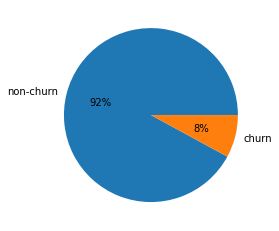

In [60]:
# Visualising Target variable
print(((churn_data['churn'].value_counts()/len(churn_data))*100).round(2))
((churn_data['churn'].value_counts()/len(churn_data))*100)
plt.pie(x=churn_data['churn'].value_counts().values,
        labels=['non-churn', 'churn'], autopct='%0.0f%%')
plt.show()

Observation: 

We can observe that there is an imbalance in the dataset. Around 92 % of the customers do not churn while only 8 % of them do churn. 

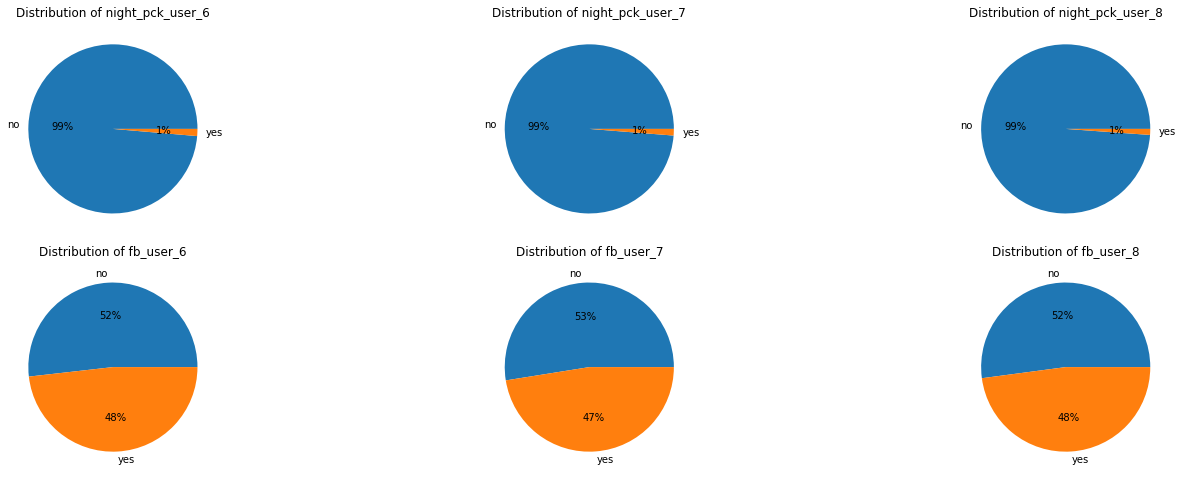

In [61]:
# Visualising categoriacal variable
c = 1
plt.figure(figsize=(20, 20))
for col in cat_cols:
    plt.subplot(6, 3, c)
    plt.pie(x=churn_data[col].value_counts().values,
            labels=['no', 'yes'], autopct='%0.0f%%')
    plt.title('Distribution of {}'.format(col))
    c = c+1
plt.tight_layout()
plt.show()

Observation 

We observe that a majority (~99%) of the users do not have a night pack. 

However, there are significant fb_users, atleast close to 50%


In [62]:
# Custom function to help plot graphs 

# Check again : try to add share y
def plot_numerical_monthly_plot(col_name):
    plt.figure(figsize=(10, 15))
    plt.subplot(3, 3, 1,)
    sns.boxplot(data=churn_data, x='churn', y=col_name +
                '_6', showfliers=False, whis=[5, 95])
    plt.xticks([0, 1], labels=['non-churn', 'churn'])
    plt.title(' {} '.format(col_name+'_6'))
    plt.xlabel('')

    plt.subplot(3, 3, 2)
    sns.boxplot(data=churn_data, x='churn', y=col_name +
                '_7', showfliers=False, whis=[5, 95])
    plt.xticks([0, 1], labels=['non-churn', 'churn'])
    plt.title(' {} '.format(col_name+'_7'))
    plt.xlabel('')

    plt.subplot(3, 3, 3)
    sns.boxplot(data=churn_data, x='churn', y=col_name +
                '_8', showfliers=False, whis=[5, 95])
    plt.xticks([0, 1], labels=['non-churn', 'churn'])
    plt.title(' {} '.format(col_name+'_8'))
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

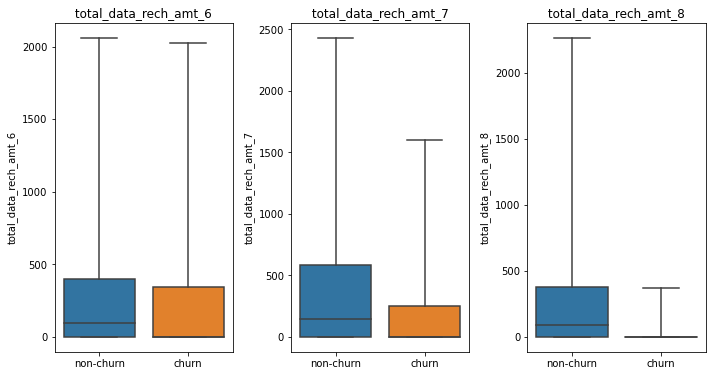

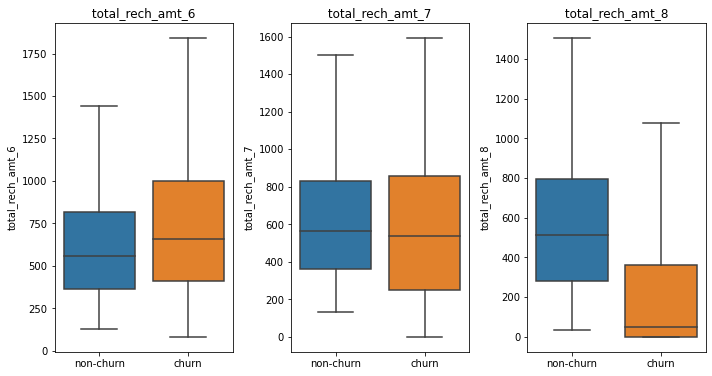

In [63]:
plot_numerical_monthly_plot(col_name='total_data_rech_amt')
plot_numerical_monthly_plot(col_name='total_rech_amt')

Observation

We observe that the **total_rech_amt_data** and **total_rech_amt** for churn reduces gradually for the churn users, while it appears to remains unchanged for the non-churn or users who are retained

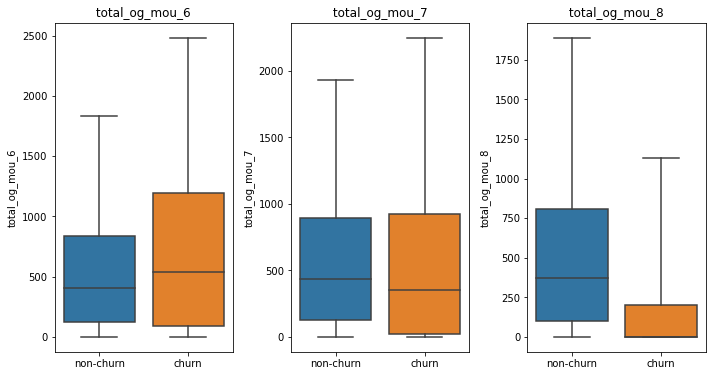

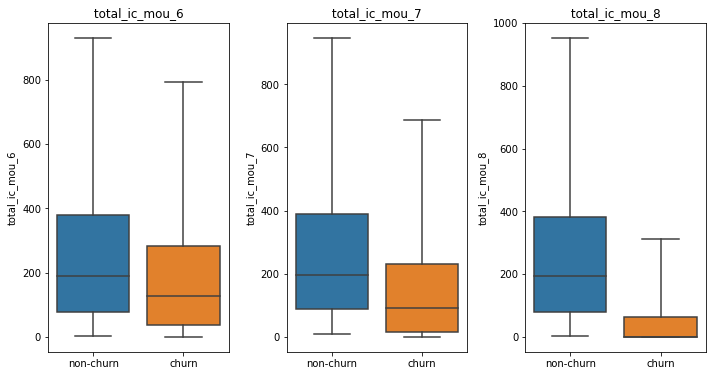

In [64]:
plot_numerical_monthly_plot(col_name='total_og_mou')
plot_numerical_monthly_plot(col_name='total_ic_mou')

Observations:

1. We observe that for both **total_og_mou** and **total_ic_mou** for churn reduces gradually for the churn users, whereas the same metrics remain more or less the same for the non-churn users

2. The total outgoing call minutes appears to be higher for churners than non-churners in the first month. This may indicate that high users are the ones who may consider churning more

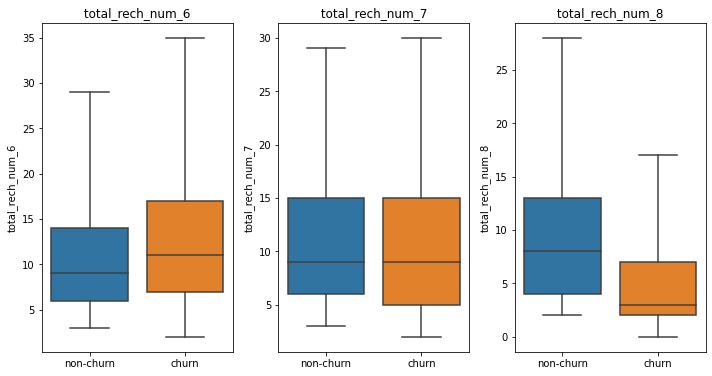

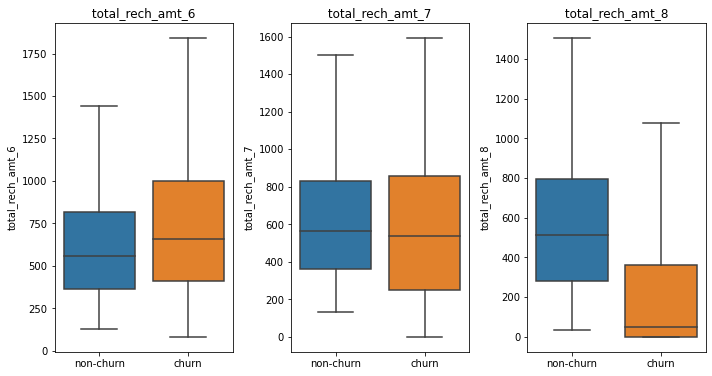

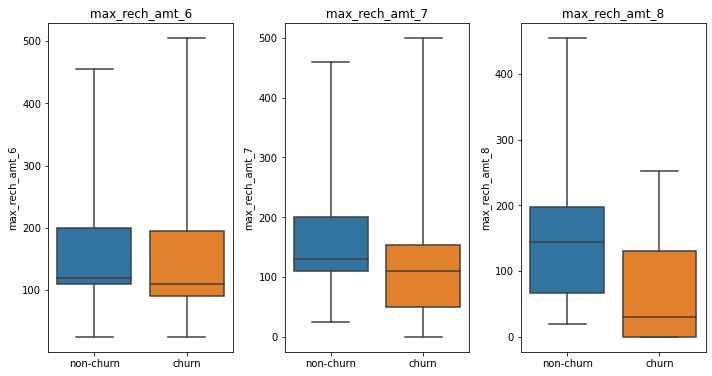

In [65]:
plot_numerical_monthly_plot(col_name='total_rech_num')
plot_numerical_monthly_plot(col_name='total_rech_amt')
plot_numerical_monthly_plot(col_name='max_rech_amt')

Observations:

1. Surprisingly the **total_recharge_num** is greater for churn users than non-churn users in the good phase, however, it drastically falls during the action phase. This might be an indication that users who churn are more active users in general

2. We observe that the **total_recharge_amount** for churn reduces gradually for the churn users especially in the action phase (8th month) 

3. While the **maximum recharge amount** spent by non-churn users tends to remain in the same range, the churn users exhbit a reducing trend for the maximium recharge amount. This is especially visibly in the action phase. 

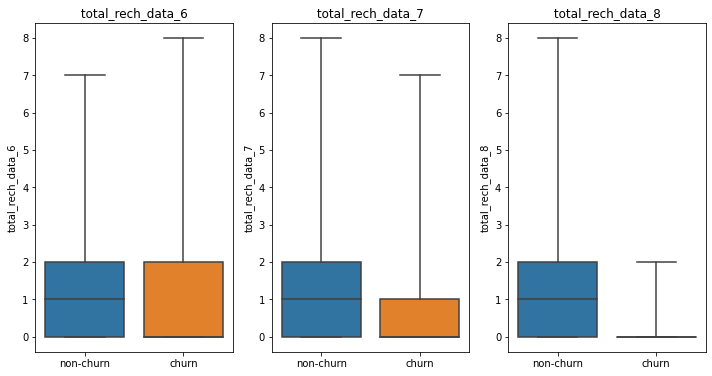

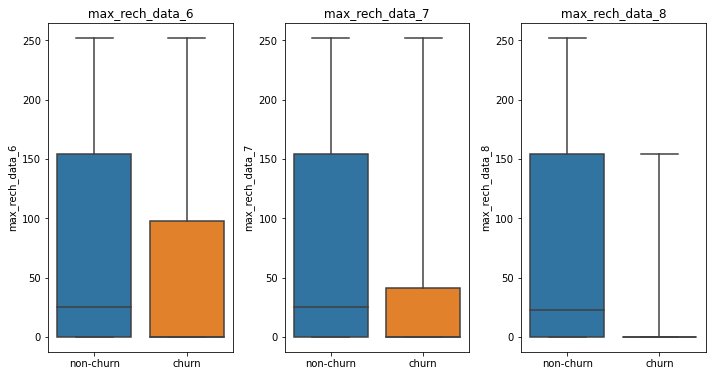

In [66]:
plot_numerical_monthly_plot(col_name='total_rech_data')
plot_numerical_monthly_plot(col_name='max_rech_data')

Observations:

1. We observe that the **total data recharge amount** for churn reduces for the churn users in the second month itself.

2. The slope of **maximum recharge data** is downwards for churn users and more or less constant for non-churn users

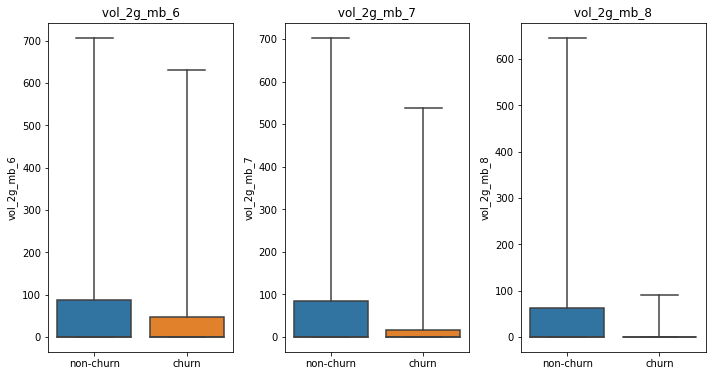

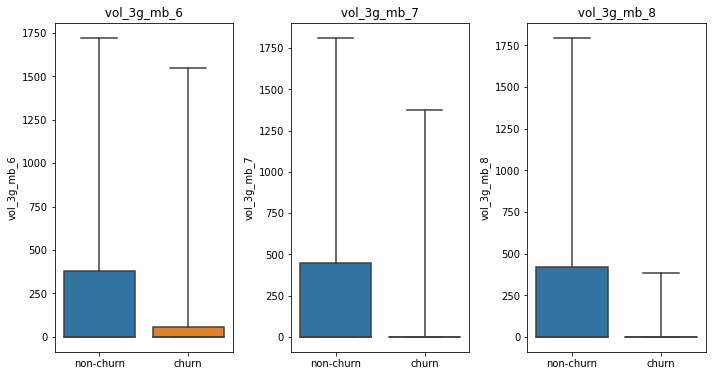

In [67]:
plot_numerical_monthly_plot(col_name='vol_2g_mb')
plot_numerical_monthly_plot(col_name='vol_3g_mb')

Observations:

1. We observe that both **vol_2g_mb** and **vol_3g_mb** for churn users reduces gradually for the churn users
2. It is also evident that the volume of 3g drops in the 7th month (2nd month of good phase) for churn users and could be a good indicator

## Correlation analysis

In [68]:
# Checking correlation amongst the independent variables, to drop the highly correlated ones
churn_data_corr = churn_data.corr()
churn_data_corr.loc[:, :] = np.tril(churn_data_corr, k=-1)
churn_data_corr = churn_data_corr.stack()
churn_data_corr
churn_data_corr[(churn_data_corr > 0.80) | (
    churn_data_corr < -0.80)].sort_values(ascending=False)

sachet_2g_8            count_rech_2g_8          0.987167
sachet_2g_7            count_rech_2g_7          0.986406
sachet_2g_6            count_rech_2g_6          0.984860
total_rech_amt_8       arpu_8                   0.963979
total_rech_amt_6       arpu_6                   0.955028
total_rech_amt_7       arpu_7                   0.953983
isd_og_mou_8           isd_og_mou_7             0.943389
total_rech_amt_action  total_data_rech_amt_8    0.942423
isd_og_mou_8           isd_og_mou_6             0.918919
isd_og_mou_7           isd_og_mou_6             0.916470
count_rech_2g_6        total_rech_data_6        0.911053
count_rech_2g_7        total_rech_data_7        0.910095
count_rech_2g_8        total_rech_data_8        0.906526
sachet_2g_7            total_rech_data_7        0.904105
sachet_2g_6            total_rech_data_6        0.903543
sachet_2g_8            total_rech_data_8        0.900531
total_ic_mou_6         loc_ic_mou_6             0.896370
total_ic_mou_8         loc_ic_m

In [69]:
corr_matrix = churn_data.corr().abs()

# Identifying Upper triangle
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
print("List of highly correlated features from the above plot - \n",highly_corr_features)
print("Total features with high correlation - ", len(highly_corr_features))

List of highly correlated features from the above plot - 
 ['isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'total_rech_amt_action']
Total features with high correlation -  19


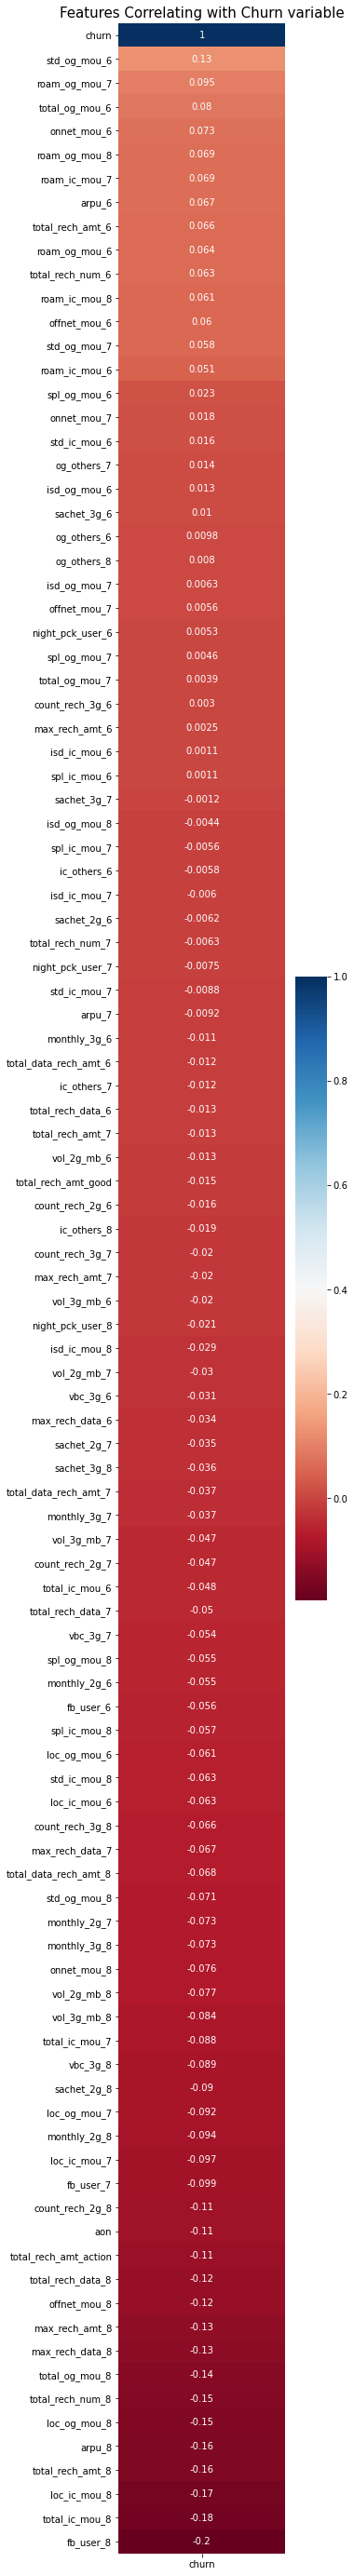

In [70]:
# Checking Correlation between churn and the other variable in the dataset
plt.figure(figsize=(4, 50))
heatmap_churn = sns.heatmap(churn_data.corr()[['churn']].sort_values(ascending=False, by='churn'), annot=True, cmap='RdBu')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)
plt.show()

Observation: 

Outgoing calls in the months of Jun (6) and Jul (7) are positively correlated with churn while attributes of Aug (8) are negatively correlated.

## Step 6: Outlier treatment

In [71]:
churn_data[num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
max_rech_data_6,29824.0,78.109643,112.604619,0.0,0.00000,25.0000,154.00000,252.0000,252.00000,455.00000,1555.000
roam_og_mou_6,29824.0,26.587856,115.896578,0.0,0.00000,0.0000,0.00000,50.6590,145.68250,530.68010,3775.110
roam_ic_mou_8,29824.0,12.540844,74.296839,0.0,0.00000,0.0000,0.00000,15.1370,56.45700,281.98070,4169.810
vol_2g_mb_6,29824.0,126.702837,330.634468,0.0,0.00000,0.0100,83.82000,411.4660,703.59600,1542.95390,10285.900
monthly_3g_6,29824.0,0.217778,0.613546,0.0,0.00000,0.0000,0.00000,1.0000,1.00000,3.00000,14.000
isd_og_mou_7,29824.0,2.105380,45.671468,0.0,0.00000,0.0000,0.00000,0.0000,0.68000,36.86700,5490.280
std_og_mou_6,29824.0,347.042871,607.363864,0.0,0.41000,45.6300,466.16750,1113.3400,1550.23000,2737.70350,8432.990
total_rech_num_7,29824.0,11.749464,9.428870,0.0,6.00000,9.0000,15.00000,23.0000,29.00000,48.00000,138.000
vol_3g_mb_8,29824.0,352.732650,920.707464,0.0,0.00000,0.0000,359.79250,1106.3670,1738.61250,3954.80250,30036.060
std_ic_mou_7,29824.0,49.226000,148.511175,0.0,1.08000,12.1850,43.96500,110.2810,194.61000,592.29550,6745.760


### 6.1 Box plots for numeric variables

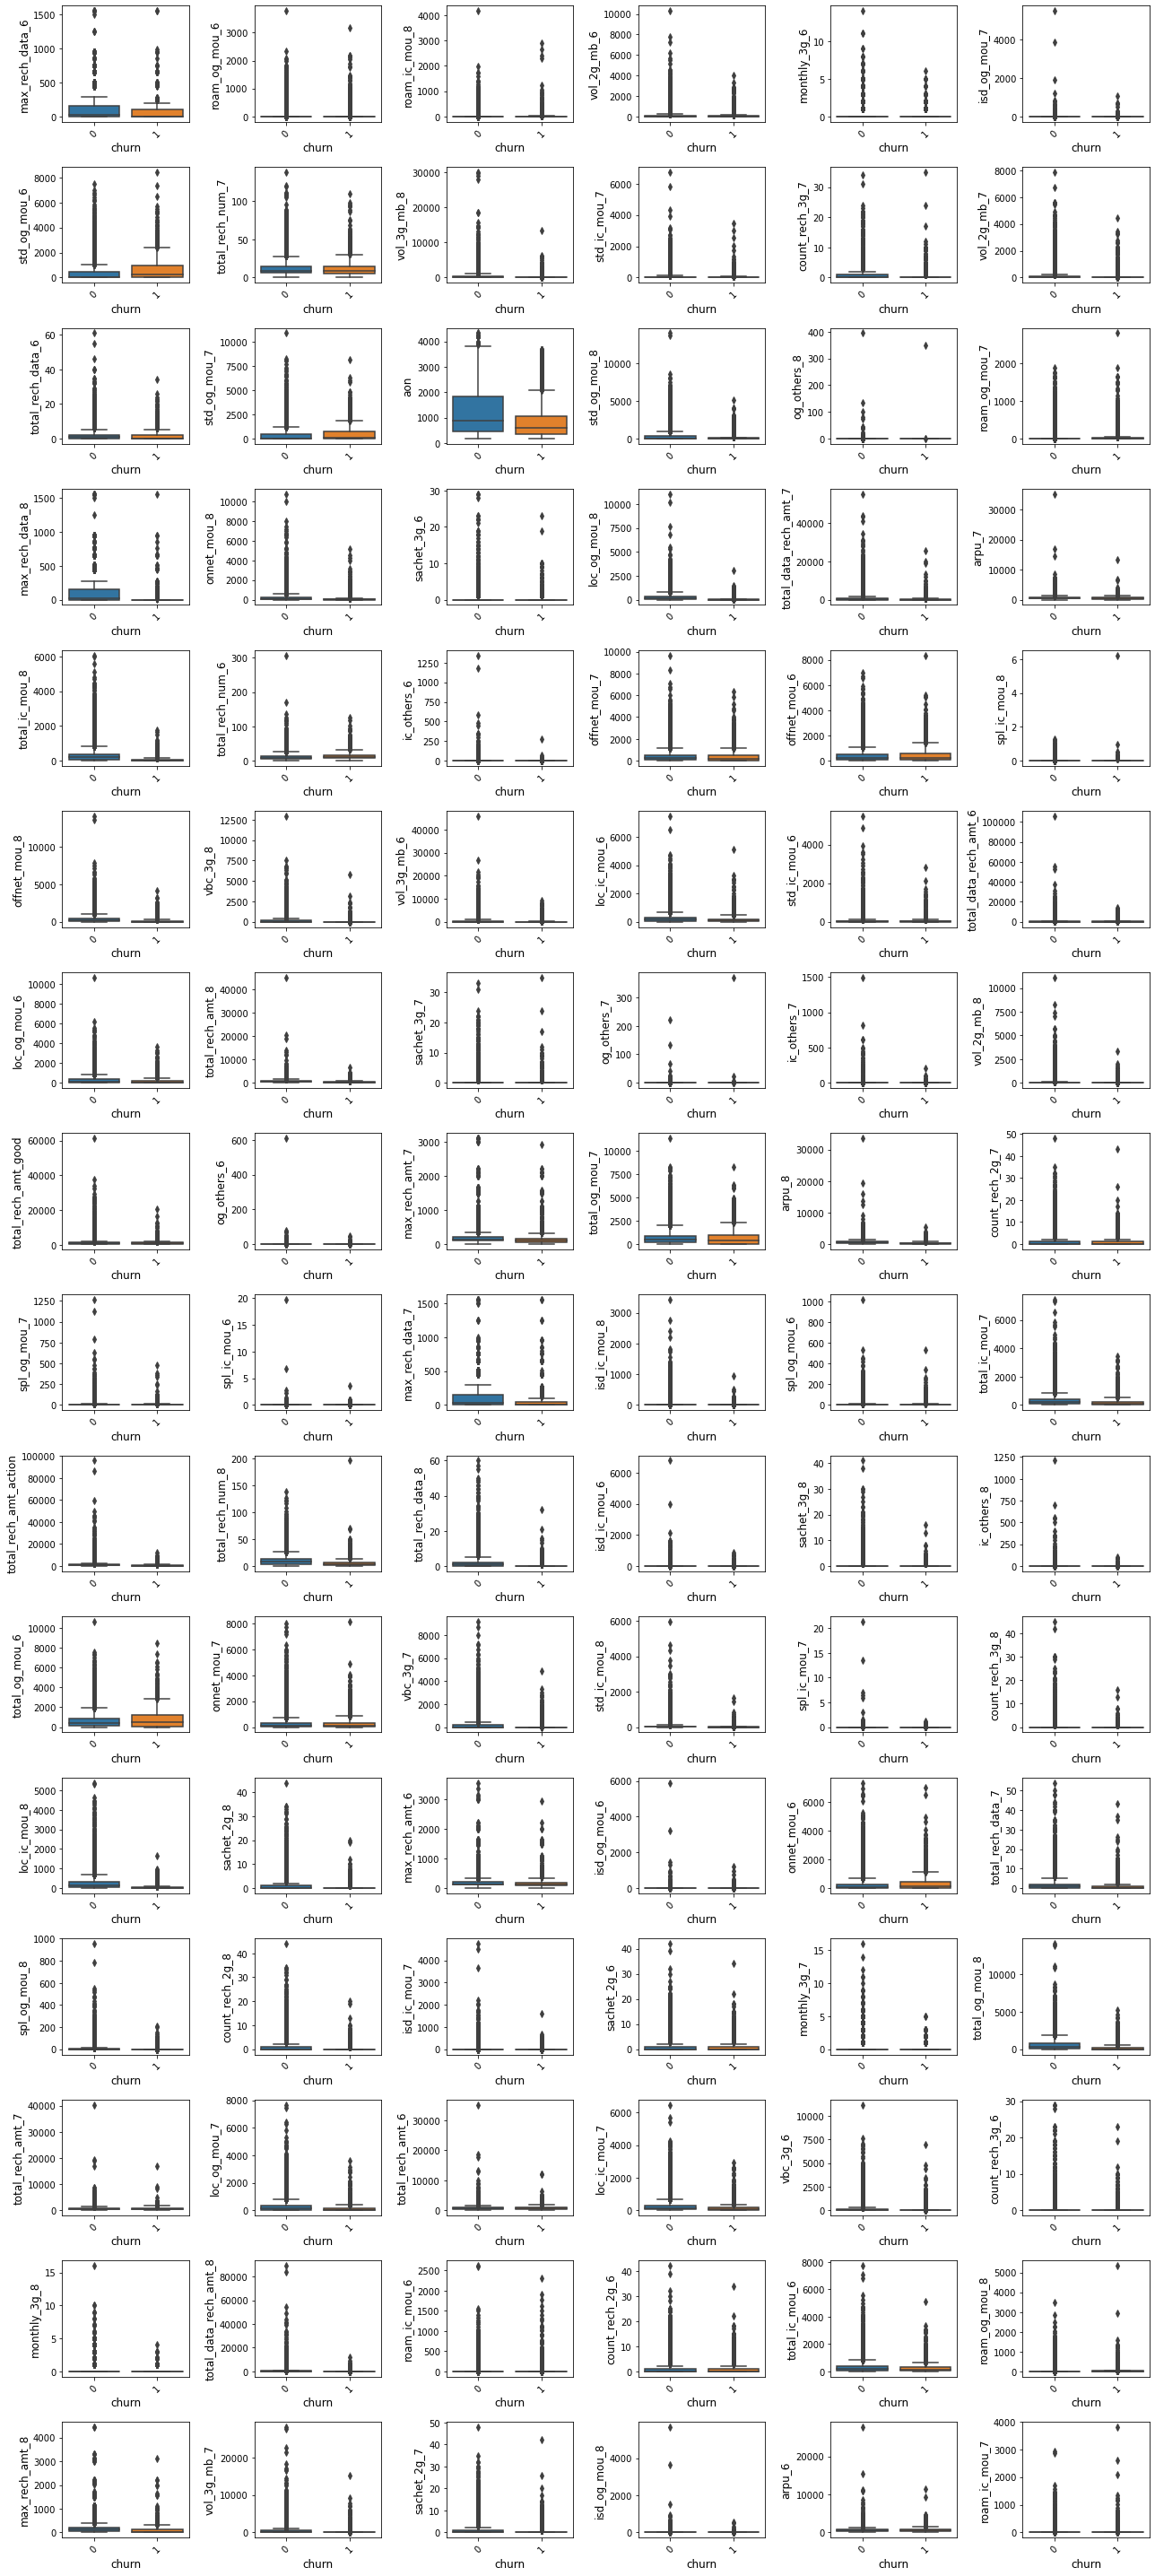

In [72]:
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=churn_data, x='churn', ax=ax)
        ax.set_ylabel(num_cols[i], fontsize=12)
        ax.set_xlabel('churn', fontsize=12)

fig.tight_layout()

Observation:

Based on the box plots and the percentiles chart, it is evident that many of the variables have outliers. 

In [73]:
# Creating a list of numerical colums so that we can analyse the skewness and treat accordingly.
# We dont treat churn as it is a target variable and aon is related to time, hence we avoid treating it
numvar = churn_data.columns.tolist()
numvar.remove('aon')
numvar.remove('churn')
for i in cat_cols:
    numvar.remove(i)
numvar

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6

In [74]:
# Finding skewed numerical features

# Check again : This was copied code, have we changed it ?

skew_features = churn_data[numvar].apply(
    lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.2]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.2 ".format(
    high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features

There are 98 numerical features with Skew > 0.2 


og_others_7              111.573308
og_others_6              109.956236
og_others_8              99.877792 
isd_og_mou_8             89.303685 
isd_og_mou_6             87.350502 
isd_og_mou_7             83.732621 
spl_ic_mou_7             72.245608 
ic_others_6              58.658373 
ic_others_8              47.065067 
ic_others_7              44.294097 
spl_ic_mou_6             41.404655 
isd_ic_mou_6             34.762878 
isd_ic_mou_7             24.399639 
total_data_rech_amt_6    22.711564 
spl_og_mou_7             19.442443 
total_data_rech_amt_8    19.117894 
roam_ic_mou_8            18.652363 
total_rech_amt_8         18.072414 
arpu_7                   17.696551 
isd_ic_mou_8             17.373783 
roam_ic_mou_7            17.313263 
total_rech_amt_action    16.595871 
total_rech_amt_7         16.215851 
arpu_8                   15.417124 
spl_og_mou_6             15.404445 
roam_og_mou_8            14.525409 
spl_og_mou_8             14.426985 
std_ic_mou_7             13.

In [75]:
# Applying box-cox transformation 

# Check again : This was copied code, have we changed it ?
for i in skew_index:
    churn_data[i] = boxcox1p(churn_data[i], boxcox_normmax(churn_data[i] + 1))

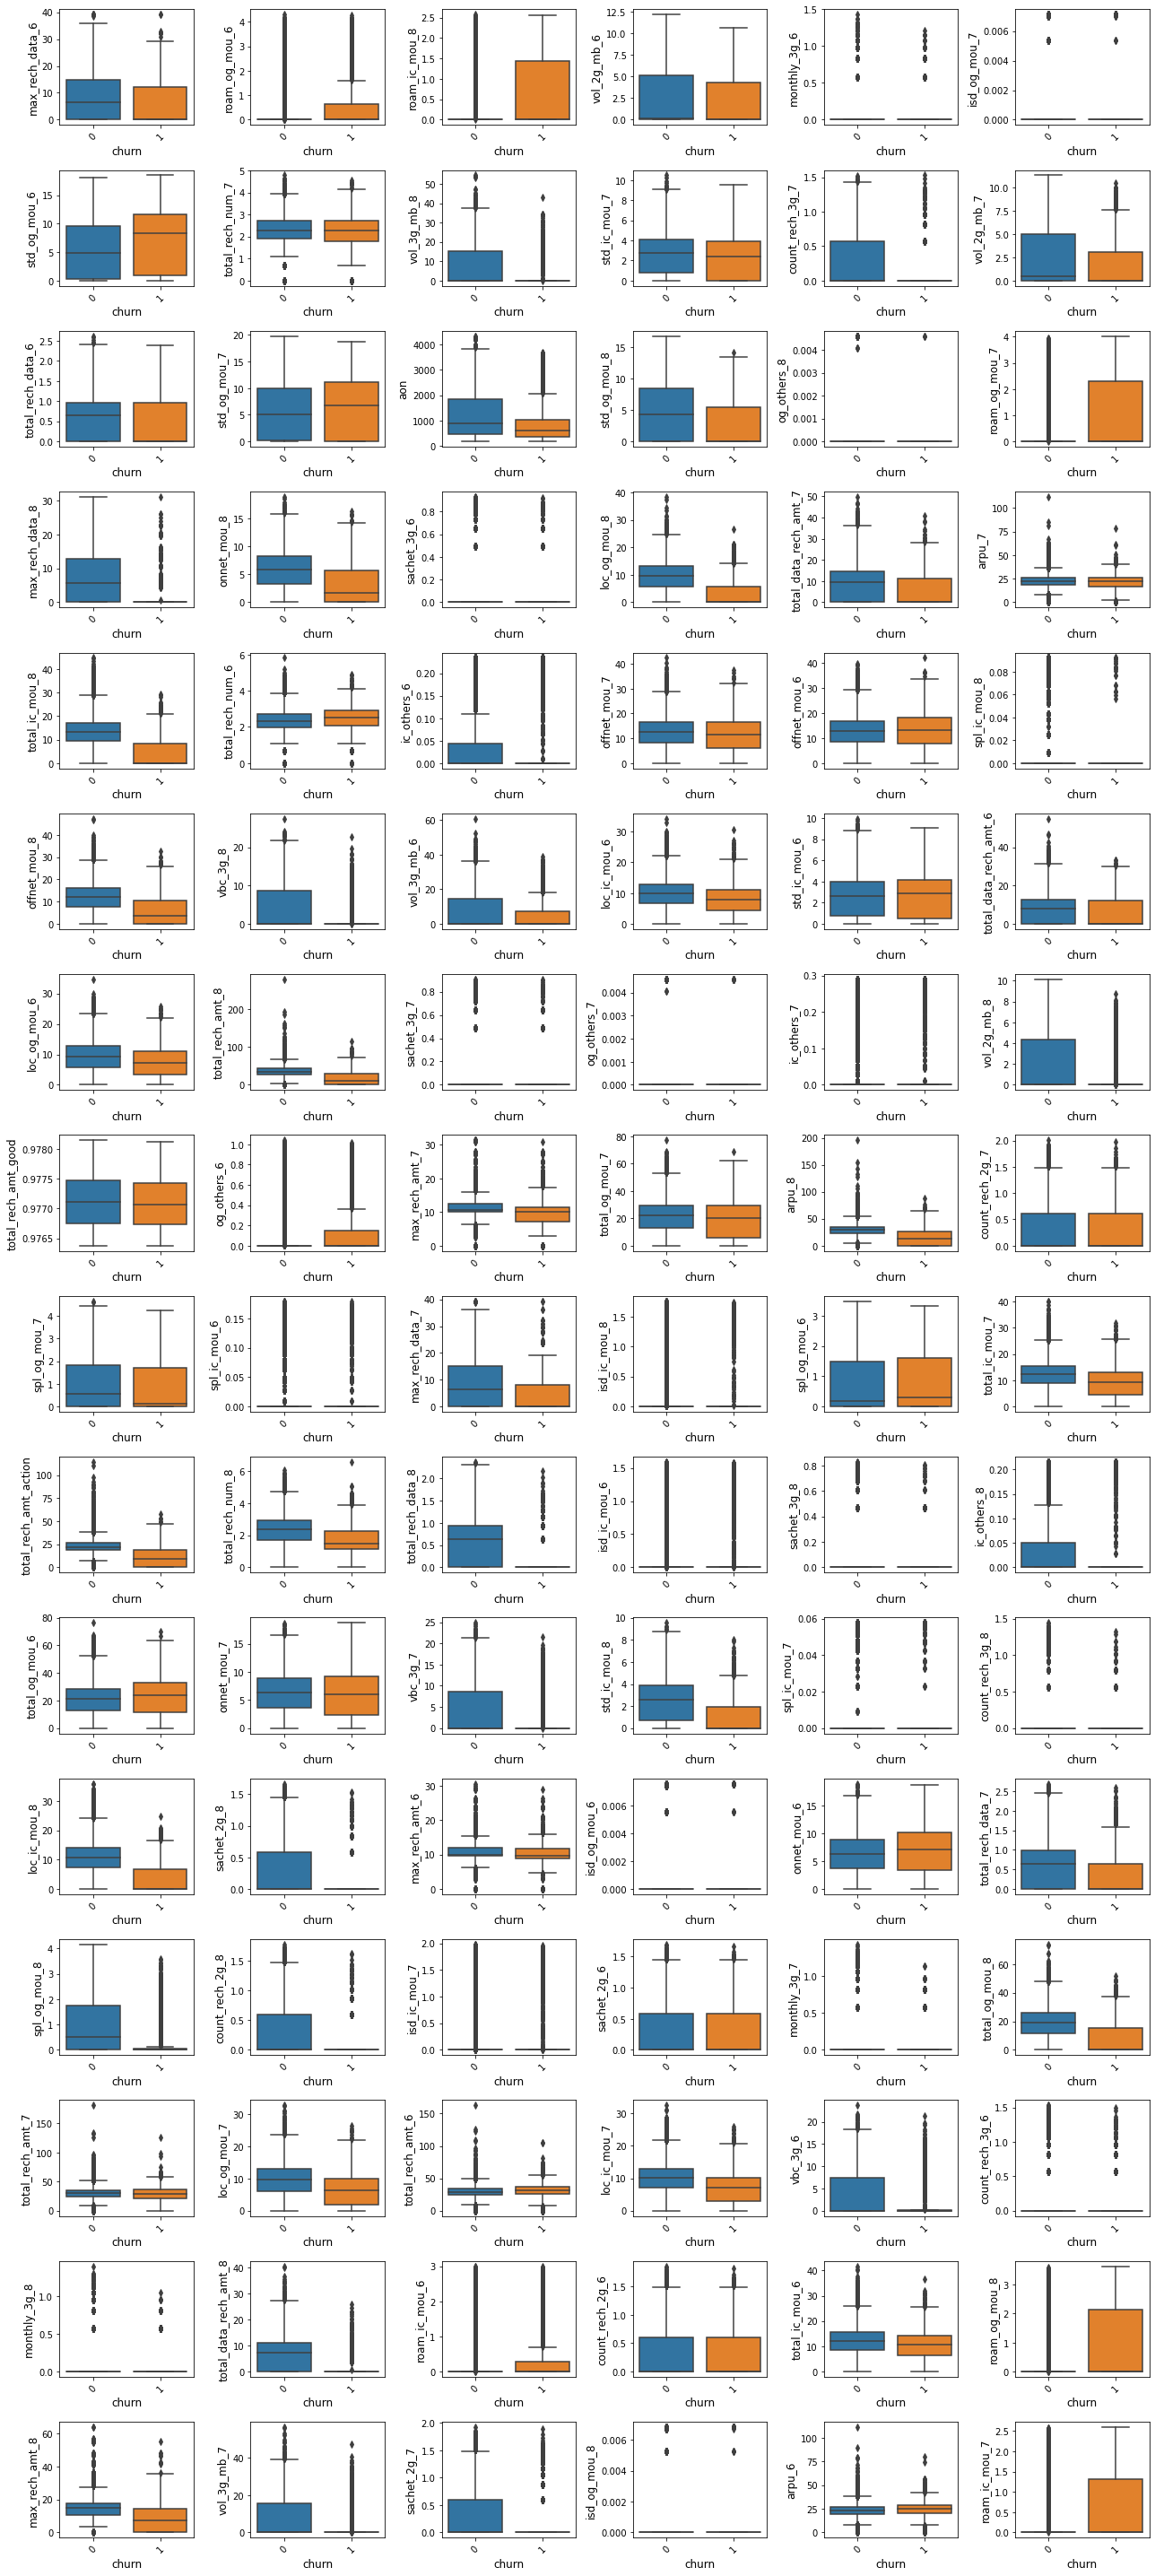

In [76]:
# Visualising data after transforming
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=churn_data, x='churn', ax=ax)
        ax.set_ylabel(num_cols[i], fontsize=12)
        ax.set_xlabel('churn', fontsize=12)

fig.tight_layout()

All the outliers have been handled. 

# Derive new features

## Derive tenure

In [77]:
# Deriving tenure, which is the number of months the customer is on network
churn_data['tenure'] = (churn_data['aon']/30).round(0)
churn_data.drop('aon', axis=1, inplace=True)

In [78]:
# Making a list of numerical columns 
num_cols = list(map(lambda x: x.replace('aon', 'tenure'), num_cols))

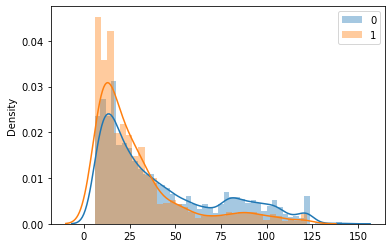

In [79]:
# Visualising tenure
sns.distplot(x=churn_data['tenure'][churn_data['churn'] == 0], label='0')
sns.distplot(x=churn_data['tenure'][churn_data['churn'] == 1], label='1')
plt.legend(loc='best')
plt.show()

Observation: 

From the distplot, there seems to be a higher churn rate in new customers (upto 20 months) than with those who have stayed with the network for a longer time.

## Good and Action variables



Combining the variables of months _6 and _7 to good and _8 to action.
Combining the good variables will decrease the number of variables and will also capture the trends of both together in all the modeling exercises that follow.

In [80]:
# Check again : try to beautify
cols = [col for col in churn_data if '_6' in col or '_7' in col or '_8' in col]
print(cols)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'total_rech_data_6

In [81]:
# Check again : is the comment correct ?
# Making a list of numerical columns that can be modified
mod_cols = [col for col in cols if col not in cat_cols]

In [82]:
# check again : could not add comment here, try to add 
cols = list(set(i[:-2] for i in mod_cols))

In [83]:
# Clubbing data from 6th month and 7th month into good phase and 8th month into action phase
for x in cols:
    x_6 = x + '_6'
    x_7 = x + '_7'
    x_8 = x + '_8'
    x_good = x + '_good'
    x_action = x + '_action'
    churn_data[x_good] = (churn_data[x_6] + churn_data[x_7])/2
    churn_data[x_action] = churn_data[x_8]
    churn_data.drop([x_6, x_7, x_8], axis=1, inplace=True)

In [84]:
churn_data.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,total_rech_amt_good,total_rech_amt_action,churn,tenure,max_rech_data_good,max_rech_data_action,std_og_mou_good,std_og_mou_action,roam_ic_mou_good,roam_ic_mou_action,loc_og_mou_good,loc_og_mou_action,total_og_mou_good,total_og_mou_action,spl_og_mou_good,spl_og_mou_action,vbc_3g_good,vbc_3g_action,spl_ic_mou_good,spl_ic_mou_action,count_rech_3g_good,count_rech_3g_action,total_rech_num_good,total_rech_num_action,vol_3g_mb_good,vol_3g_mb_action,offnet_mou_good,offnet_mou_action,monthly_3g_good,monthly_3g_action,total_data_rech_amt_good,total_data_rech_amt_action,total_ic_mou_good,total_ic_mou_action,max_rech_amt_good,max_rech_amt_action,roam_og_mou_good,roam_og_mou_action,isd_og_mou_good,isd_og_mou_action,og_others_good,og_others_action,ic_others_good,ic_others_action,count_rech_2g_good,count_rech_2g_action,vol_2g_mb_good,vol_2g_mb_action,onnet_mou_good,onnet_mou_action,arpu_good,arpu_action,loc_ic_mou_good,loc_ic_mou_action,isd_ic_mou_good,isd_ic_mou_action,total_rech_data_good,total_rech_data_action,sachet_2g_good,sachet_2g_action,monthly_2g_good,monthly_2g_action,sachet_3g_good,sachet_3g_action,std_ic_mou_good,std_ic_mou_action
0,0.0,0.0,0.0,1.0,1.0,1.0,22.407949,24.739906,1,32.0,18.556618,15.727033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.576491,4.922227,0.000000,0.0,0.574179,0.561351,1.495542,1.148401,9.613842,9.374537,0.000000,0.000000,0.577243,0.572348,11.079966,9.771614,0.000000,2.521158,13.239235,19.397507,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.330865,1.941419,0.000000,0.000000,16.103391,20.724427,0.000000,2.443358,0.000000,0.000000,0.641327,0.626131,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,39.893216,87.655364,1,27.0,0.000000,0.000000,5.834527,5.581767,1.945767,1.956827,14.356758,12.250743,24.136702,18.784842,0.70591,1.721320,4.004685,6.230688,0.058705,0.0,0.000000,0.000000,1.786315,2.262653,0.000000,0.000000,16.916520,14.348641,0.000000,0.000000,0.000000,0.000000,18.046296,17.922283,21.926995,42.075373,2.24157,2.437736,0.003563,0.006835,0.0,0.0,0.261912,0.215574,0.000000,0.000000,0.000000,0.000000,5.556894,5.303208,32.733968,70.177331,14.001199,11.902883,1.149486,1.525459,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,5.688032,5.577580
8,0.0,0.0,0.0,0.0,1.0,1.0,28.366133,17.102615,0,10.0,7.508136,5.607673,7.184025,5.956032,0.000000,0.000000,12.779663,7.419213,22.713153,14.101097,0.00000,2.004110,10.831412,4.249889,0.000000,0.0,0.000000,0.000000,3.026551,3.024204,9.358580,3.666742,8.978424,10.515661,0.000000,0.000000,6.243803,9.223905,7.692479,4.615453,10.099330,7.173396,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.446957,1.017498,3.410243,0.029566,9.573271,4.644530,21.830878,16.787254,6.557894,4.292214,0.000000,0.000000,0.489414,1.135223,0.300899,0.989914,0.342571,0.0,0.0,0.000000,2.557727,0.562937
21,0.0,0.0,0.0,0.0,0.0,0.0,31.144239,40.988629,0,24.0,0.000000,0.000000,11.420086,10.138524,0.000000,0.000000,8.397517,9.688069,29.971371,28.851231,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.196029,3.819264,0.000000,0.000000,19.902076,20.766209,0.000000,0.000000,0.000000,0.000000,11.554543,14.913858,7.165279,9.245833,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.940644,6.164712,24.137692,34.331204,8.945430,11.200845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4.427732,4.868477
23,0.0,0.0,0.0,0.0,1.0,1.0,13.571513,32.393985,0,20.0,8.018289,13.738740,1.819558,4.555310,0.000000,0.000000,9.433203,10.912297,13.617258,16.147871,0.04714,2.336423,2.975899,5.482596,0.000000,0.0,0.408350,0.792256,1.581756,1.717786,8.689165,19.882397,8.970583,12.209920,0.411075,0.572348,7.714632,12.100091,11.506523,15.678165,5.970546,16.685137,0.00000,0.000000,0.002681,0.000000,0.0,0.0,0.14435

In [85]:
churn_data.shape

(29824, 72)

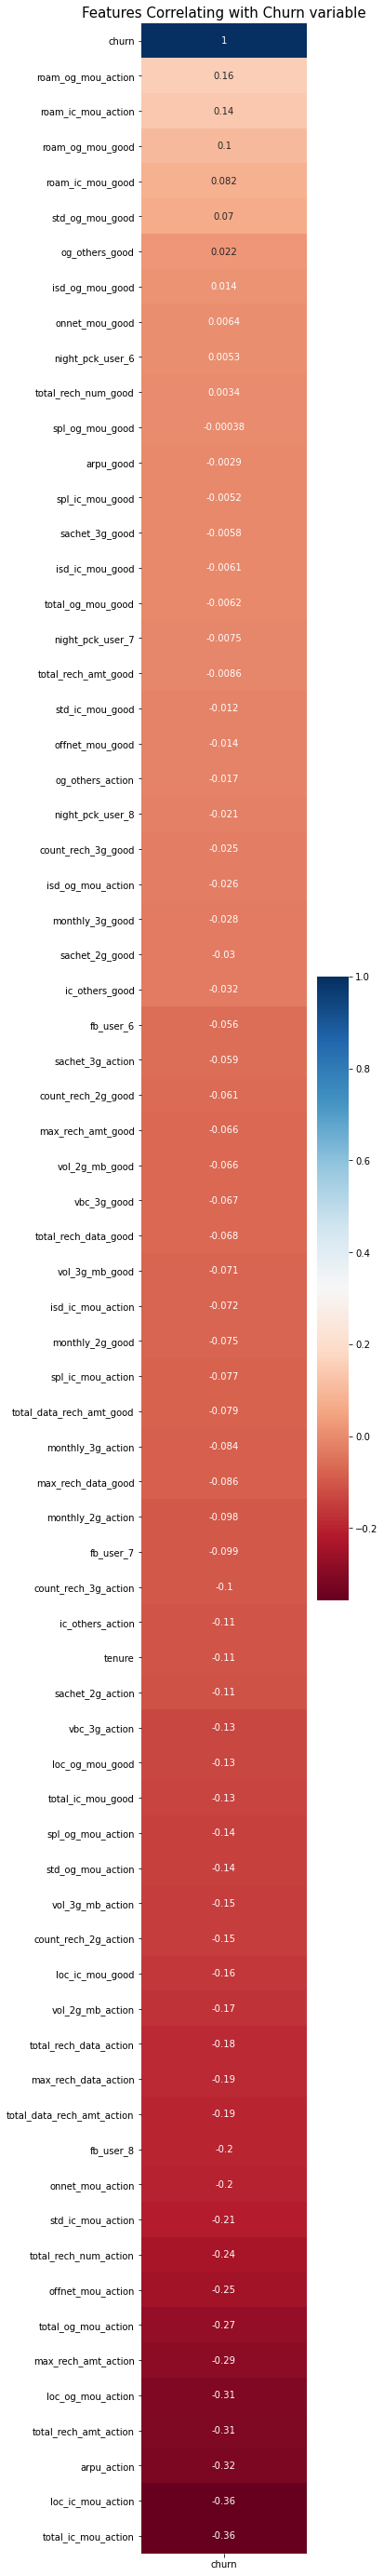

In [87]:
# ReChecking Correlation between churn and the other variable in the dataset
plt.figure(figsize=(4, 50))
heatmap_churn = sns.heatmap(churn_data.corr()[['churn']].sort_values(
    ascending=False, by='churn'), annot=True, cmap='RdBu')
heatmap_churn.set_title(
    "Features Correlating with Churn variable", fontsize=15)
plt.show()

Observation: 

The positively correlated variables are in the good phase while the negatively correlated variables are in the action phase significantly.

# Step 8: Train and test data split

## Train-test split

In [88]:
df = churn_data.copy()

In [89]:
# Creating X variable
X = df.drop(['churn'], axis=1)

In [90]:
# Creating target variable
y = df['churn']

In [91]:
# Splitting data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20876, 71)
Dimension of X_test: (8948, 71)


In [92]:
print("Dimension of y_train:", y_train.shape)
print("Dimension of y_test:", y_test.shape)

Dimension of y_train: (20876,)
Dimension of y_test: (8948,)


### 8.2 Scaling the data

In [93]:
# Check again: try to beautify
# Making a list of numerical columns to apply standardisation
num_cols = list(set(X_train.columns.to_list())-set(cat_cols))
print(num_cols)

['count_rech_2g_action', 'total_ic_mou_action', 'max_rech_amt_good', 'isd_og_mou_action', 'roam_ic_mou_good', 'count_rech_3g_good', 'spl_og_mou_action', 'monthly_3g_good', 'loc_ic_mou_good', 'std_ic_mou_good', 'std_ic_mou_action', 'total_rech_num_good', 'std_og_mou_action', 'max_rech_amt_action', 'isd_ic_mou_action', 'ic_others_good', 'std_og_mou_good', 'roam_og_mou_action', 'og_others_good', 'max_rech_data_action', 'loc_ic_mou_action', 'sachet_2g_good', 'count_rech_2g_good', 'sachet_3g_good', 'count_rech_3g_action', 'isd_og_mou_good', 'total_rech_data_good', 'isd_ic_mou_good', 'ic_others_action', 'tenure', 'vol_2g_mb_good', 'arpu_good', 'total_og_mou_good', 'total_data_rech_amt_action', 'offnet_mou_good', 'sachet_3g_action', 'total_rech_amt_good', 'loc_og_mou_action', 'loc_og_mou_good', 'total_data_rech_amt_good', 'total_rech_amt_action', 'arpu_action', 'vbc_3g_good', 'roam_og_mou_good', 'spl_ic_mou_good', 'vol_3g_mb_good', 'onnet_mou_action', 'monthly_3g_action', 'spl_ic_mou_action',

In [94]:
# Scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,total_rech_amt_good,total_rech_amt_action,tenure,max_rech_data_good,max_rech_data_action,std_og_mou_good,std_og_mou_action,roam_ic_mou_good,roam_ic_mou_action,loc_og_mou_good,loc_og_mou_action,total_og_mou_good,total_og_mou_action,spl_og_mou_good,spl_og_mou_action,vbc_3g_good,vbc_3g_action,spl_ic_mou_good,spl_ic_mou_action,count_rech_3g_good,count_rech_3g_action,total_rech_num_good,total_rech_num_action,vol_3g_mb_good,vol_3g_mb_action,offnet_mou_good,offnet_mou_action,monthly_3g_good,monthly_3g_action,total_data_rech_amt_good,total_data_rech_amt_action,total_ic_mou_good,total_ic_mou_action,max_rech_amt_good,max_rech_amt_action,roam_og_mou_good,roam_og_mou_action,isd_og_mou_good,isd_og_mou_action,og_others_good,og_others_action,ic_others_good,ic_others_action,count_rech_2g_good,count_rech_2g_action,vol_2g_mb_good,vol_2g_mb_action,onnet_mou_good,onnet_mou_action,arpu_good,arpu_action,loc_ic_mou_good,loc_ic_mou_action,isd_ic_mou_good,isd_ic_mou_action,total_rech_data_good,total_rech_data_action,sachet_2g_good,sachet_2g_action,monthly_2g_good,monthly_2g_action,sachet_3g_good,sachet_3g_action,std_ic_mou_good,std_ic_mou_action
7322,0.0,0.0,0.0,0.0,0.0,0.0,0.119528,-0.013787,-0.923721,-1.065760,-0.926217,1.363815,1.159827,-0.540971,-0.436669,0.112129,0.127743,1.041392,0.650957,0.094258,0.728515,-0.690800,-0.664438,-0.516633,-0.298858,-0.605652,-0.512589,0.285166,0.461664,-0.728009,-0.667244,-0.411831,-0.240135,-0.461502,-0.40144,-1.079808,-0.927117,0.405144,0.263271,-0.255463,0.063444,-0.542347,-0.434981,-0.341703,-0.262878,-0.503458,-0.075061,-0.620263,-0.537271,-0.83652,-0.739851,-0.902378,-0.776894,1.632798,1.290372,0.136944,-0.031298,0.481120,0.350153,0.794136,-0.469458,-1.064812,-0.927491,-0.651239,-0.590353,-0.479103,-0.397224,-0.390988,-0.309339,0.195306,0.762068
45875,0.0,0.0,1.0,1.0,1.0,1.0,-1.808050,-0.803716,-0.641896,-0.010996,0.059200,-1.064192,-0.623217,-0.540971,-0.063696,-1.511418,-1.526164,-1.676189,-1.332776,-0.261463,0.421032,-0.690800,0.735833,-0.516633,-0.298858,0.833479,1.373194,-0.197166,0.671405,0.048493,1.306979,-1.794184,-1.657644,-0.461502,-0.40144,0.832391,1.153109,-2.028704,-1.520324,-1.594509,-1.061560,-0.542347,1.067527,-0.341703,-0.262878,-0.503458,-0.075061,-0.620263,-0.537271,1.50046,1.857987,1.467855,1.431786,-1.450609,-0.785685,-1.931060,-0.913473,-1.888236,-1.678802,-0.531860,-0.469458,1.508614,1.724132,1.705413,2.047902,-0.479103,-0.397224,1.666156,2.603078,-1.435240,-0.383568
72471,0.0,0.0,0.0,0.0,0.0,0.0,1.671710,1.068261,-0.046933,-1.065760,-0.926217,1.642944,1.580287,-0.540971,-0.436669,0.416524,0.622456,1.611249,1.462136,0.707758,1.167278,-0.690800,-0.664438,2.273362,-0.298858,-0.605652,-0.512589,0.961726,0.344413,-0.728009,-0.667244,-0.027224,0.110804,-0.461502,-0.40144,-1.079808,-0.927117,0.433945,0.662720,-0.095825,0.168896,-0.542347,-0.434981,-0.341703,-0.262878,2.599327,-0.075061,-0.620263,-0.537271,-0.83652,-0.739851,-0.902378,-0.776894,1.989888,1.887596,1.650690,1.042992,0.585484,0.777470,-0.531860,-0.469458,-1.064812,-0.927491,-0.651239,-0.590353,-0.479103,-0.397224,-0.390988,-0.309339,0.557698,0.846126
51933,0.0,0.0,0.0,0.0,0.0,0.0,-0.471712,0.475337,0.140950,-0.179172,-0.044378,0.875898,0.770498,-0.540971,-0.436669,0.370949,0.534332,0.403597,0.412664,-0.962578,0.724664,-0.690800,-0.664438,-0.516633,-0.298858,-0.605652,-0.512589,0.576993,0.939291,-0.728009,-0.667244,0.879456,0.672791,-0.461502,-0.40144,1.086144,0.555407,0.316473,0.591127,-0.857690,-0.024369,-0.542347,-0.434981,-0.341703,3.821167,-0.503458,-0.075061,-0.620263,-0.537271,2.01426,1.857987,-0.902378,-0.776894,-0.480050,0.266380,-0.470710,0.474651,0.194611,0.673947,2.624208,2.480468,1.718611,1.565596,2.220158,2.047902,-0.479103,-0.397224,-0.390988,-0.309339,0.932132,0.095603
41606,0.0,0.0,0.0,1.0,1.0,1.0,0.054036,0.208818,0.454088,1.097204,1.096920,0.663711,0.138139,1.407860,-0.436669,0.061904,0.271410,0.040366,-0.183407,-1.026197,1.103259,1

In [95]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,total_rech_amt_good,total_rech_amt_action,tenure,max_rech_data_good,max_rech_data_action,std_og_mou_good,std_og_mou_action,roam_ic_mou_good,roam_ic_mou_action,loc_og_mou_good,loc_og_mou_action,total_og_mou_good,total_og_mou_action,spl_og_mou_good,spl_og_mou_action,vbc_3g_good,vbc_3g_action,spl_ic_mou_good,spl_ic_mou_action,count_rech_3g_good,count_rech_3g_action,total_rech_num_good,total_rech_num_action,vol_3g_mb_good,vol_3g_mb_action,offnet_mou_good,offnet_mou_action,monthly_3g_good,monthly_3g_action,total_data_rech_amt_good,total_data_rech_amt_action,total_ic_mou_good,total_ic_mou_action,max_rech_amt_good,max_rech_amt_action,roam_og_mou_good,roam_og_mou_action,isd_og_mou_good,isd_og_mou_action,og_others_good,og_others_action,ic_others_good,ic_others_action,count_rech_2g_good,count_rech_2g_action,vol_2g_mb_good,vol_2g_mb_action,onnet_mou_good,onnet_mou_action,arpu_good,arpu_action,loc_ic_mou_good,loc_ic_mou_action,isd_ic_mou_good,isd_ic_mou_action,total_rech_data_good,total_rech_data_action,sachet_2g_good,sachet_2g_action,monthly_2g_good,monthly_2g_action,sachet_3g_good,sachet_3g_action,std_ic_mou_good,std_ic_mou_action
61506,0.0,0.0,0.0,0.0,1.0,0.0,-0.172032,-0.140706,-0.046933,0.331191,-0.926217,-0.906647,-0.851624,-0.540971,-0.436669,0.386463,0.529771,-0.370590,-0.148127,1.412335,-0.870700,-0.690800,-0.664438,1.388988,-0.298858,-0.605652,-0.512589,-0.400276,-0.450092,0.193140,-0.667244,-0.278824,-0.247237,-0.461502,-0.40144,-0.252801,-0.927117,-0.307663,-0.035301,0.445338,0.063444,-0.542347,-0.434981,-0.341703,-0.262878,-0.503458,-0.075061,0.846807,2.207344,-0.173287,-0.739851,-0.902378,-0.776894,0.007155,0.358870,-0.228134,-0.349690,-0.223411,0.137456,1.940167,0.004192,-0.476467,-0.927491,-0.651239,-0.590353,0.911412,-0.397224,-0.390988,-0.309339,-0.830925,-1.245574
56366,0.0,0.0,0.0,1.0,1.0,0.0,0.420987,-0.029167,-0.923721,1.109645,-0.926217,-1.089456,-1.099011,0.042613,-0.436669,1.117356,1.143383,0.245563,0.381505,0.436300,0.041784,-0.690800,-0.664438,-0.516633,-0.298858,-0.605652,-0.512589,0.450341,-0.450092,-0.728009,-0.667244,-0.019949,-0.251941,-0.461502,-0.40144,0.276263,-0.927117,1.078843,0.890071,0.515846,1.010843,-0.019152,-0.434981,-0.341703,-0.262878,1.749418,-0.075061,-0.620263,-0.537271,0.480510,-0.739851,1.232743,-0.776894,0.775978,1.033797,0.307159,0.069125,1.310522,1.118861,-0.455405,-0.469458,0.106797,-0.927491,-0.651239,-0.590353,2.310739,-0.397224,-0.390988,-0.309339,-1.043715,-1.245574
37019,0.0,0.0,0.0,0.0,1.0,1.0,-1.598876,-0.391539,0.140950,-0.602703,-0.008095,-0.372801,0.070400,-0.540971,-0.436669,-0.542611,-0.299232,-0.991627,-0.570928,-0.978956,0.160064,-0.416028,0.408345,-0.516633,-0.298858,-0.605652,1.373194,-0.677298,1.094641,0.058716,0.966009,-0.747842,-0.407769,-0.461502,-0.40144,0.214032,1.671540,-1.355043,-0.936072,-1.481453,-0.741425,-0.542347,-0.434981,-0.341703,-0.262878,-0.503458,-0.075061,-0.620263,-0.537271,0.775729,2.276666,-0.881375,-0.035993,-1.196874,-0.481862,-1.596547,-0.473224,-1.291751,-0.909952,-0.531860,-0.469458,0.535752,2.149049,0.990066,2.449600,-0.479103,-0.397224,-0.390988,2.603078,-0.468563,0.012563
44428,0.0,0.0,0.0,1.0,1.0,1.0,0.082561,0.683601,0.516716,1.109645,1.107629,0.046184,0.132304,-0.540971,-0.436669,1.272852,1.099462,0.539165,0.447082,2.269929,1.563681,0.537551,0.263409,-0.516633,-0.298858,-0.605652,-0.512589,-1.003857,-0.681625,0.387353,0.170956,0.902945,0.776169,-0.461502,-0.40144,0.276263,0.387738,0.842424,0.728501,1.777553,1.488970,-0.542347,-0.434981,-0.341703,-0.262878,-0.503458,-0.075061,-0.620263,0.286762,0.480510,0.530126,0.263084,0.099592,0.106372,0.115195,0.362619,0.181949,0.969717,0.834514,-0.531860,1.426354,0.106797,0.197404,-0.651239,-0.590353,2.310739,2.265972,-0.390988,-0.309339,0.870013,0.873360
45798,0.0,0.0,0.0,1.0,1.0,0.0,0.568382,0.281508,0.673285,1.235693,-0.926217,0.658568,0.563237,-0.540971,-0.436669,0.342122,0.350766,0.218530,0.092284,1.372186,1.01802

## Handling data imbalance using SMOTE

Using SMOTE to handle the class imbalance observed in the data. Synthetic Minority Oversampling TEchnique, or SMOTE is the most widely used approach to synthesizing new examples. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [96]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [97]:
# Check again : why is this commented

#X_train_smote = pd.DataFrame(data = X_train_smote)
#y_train_smote = pd.DataFrame(data = y_train_smote)

In [98]:
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)

X_train_smote shape: (38392, 71)
y_train_smote shape: (38392,)


# Modeling

In all the models below we will capture accuracy, sensitivity (recall), specificity, precsision, F1 and AUC. 
Among these we will use the models with high Recall and explainability. Recall identifies the % of people who have been correctly identified as churned.

##  Logistic regression

Building 3 variants of logistic regression to predict churn:
1. RFE and manual tuning based logistic regression without handling class imbalance
2. RFE and manual tuning based logistic regression with SMOTE to handle class imbalance 
3. PCA based logistic regression with SMOTE to handle class imbalance

In [99]:
# function for getting column list based on rfe for logistic regression

def rfe_logreg(X_train, y_train, features):
    logreg = LogisticRegression()
    rfe = RFE(logreg, n_features_to_select=features)
    rfe = rfe.fit(X_train, y_train)
    col = list(X_train.columns[rfe.support_])
    return col

In [100]:
# function for building Logreg models
def logreg_model(X_train_col, y_train):
    X_train_sm = sm.add_constant(X_train_col)
    log_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    log_model = log_model.fit()
    return log_model, X_train_sm

In [101]:
def vif_cal(X_train_col):
    vif = pd.DataFrame()
    vif['Features'] = X_train_col.columns
    vif['VIF'] = [variance_inflation_factor(
        X_train_col.values, i) for i in range(X_train_col.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [102]:
# Metrics
def log_metrics(log_model, X_train_sm, y_train):
    y_train_pred = log_model.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    y_train_actual = y_train.values.reshape(-1)
    y_train_pred_df = pd.DataFrame({'Churn_actual': y_train_actual, 'Churn_pred_prob': y_train_pred})

    numbers = [float(x)/10 for x in range(10)]

    for i in numbers:
        y_train_pred_df[i] = y_train_pred_df['Churn_pred_prob'].map(lambda x: 1 if x > i else 0)

    # metrics
    metrics_df = pd.DataFrame(
        columns=['prob', 'accuracy', 'specificity', 'precision', 'recall'])

    for i in numbers:
        confusion = metrics.confusion_matrix(y_train_pred_df['Churn_actual'], y_train_pred_df[i])
        accuracy = round(metrics.accuracy_score(y_train_pred_df['Churn_actual'], y_train_pred_df[i]), 4)
        TP = confusion[1, 1]  # True positive
        TN = confusion[0, 0]  # True negative
        FP = confusion[0, 1]  # False positive
        FN = confusion[1, 0]  # False negative
        specificity = round(TN/float(TN+FP), 4)
        precision = round(TP/float(TP+FP), 4)
        recall = round(TP/float(TP+FN), 4)
        metrics_df.loc[i] = [i, accuracy, specificity, precision, recall]

    plt.figure(figsize=(16, 8))

    # plotting the graphs
    plt.subplot(1, 2, 1)
    sns.lineplot(data=metrics_df)
    plt.xticks(np.arange(0, 1, step=0.1), size=8)
    plt.yticks(size=12)
    plt.legend(loc='best')
    plt.title('Metrics')
    plt.xlabel('Churn probability')
    plt.ylabel('Metrics')

    # AUC-ROC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_df['Churn_actual'], y_train_pred_df['Churn_pred_prob'],
                                             drop_intermediate=False)
    auc_score = metrics.roc_auc_score(y_train_pred_df['Churn_actual'], y_train_pred_df['Churn_pred_prob'])
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return y_train_pred_df

In [103]:
# Getting final y_pred_train
def final_y_pred(log_model, X_data, y_data, cutoff):
    y_pred_prob = log_model.predict(X_data)
    y_pred_prob = y_pred_prob.values.reshape(-1)
    y_actual = y_data.values.reshape(-1)
    y_pred_final = pd.DataFrame({'Churn_actual': y_actual, 'Churn_pred_prob': y_pred_prob})
    y_pred_final['final_pred'] = y_pred_final['Churn_pred_prob'].map(lambda x: 1 if x > cutoff else 0)
    return y_pred_final

In [104]:
# Model evaluation

def model_eval(y_actual, y_pred):

    print("Evaluation report data:\n", classification_report(y_actual, y_pred))

    accuracy = round(accuracy_score(y_actual, y_pred), 4)
    precision = round(precision_score(y_actual, y_pred), 4)
    recall = round(recall_score(y_actual, y_pred), 4)
    f1 = round(f1_score(y_actual, y_pred), 4)
    conf_matrix = confusion_matrix(y_actual, y_pred)  # confusion matrix
    model_roc_auc = round(roc_auc_score(y_actual, y_pred), 4)  # roc_auc_score
    specificity = round(specificity_score(y_actual, y_pred), 4)

    print("Accuracy score   : ", accuracy)
    print("Specificity score: ", specificity)
    print("Precision score  : ", precision)
    print("Recall score     : ", recall)
    print("F1 score         : ", f1)
    print("Area under curve : ", model_roc_auc, "\n")

    # Confusion Matrix
    cf_matrix = metrics.confusion_matrix(y_actual, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(
        value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(
        group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=[
                'Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'], cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    return (accuracy, specificity, precision, recall, f1, model_roc_auc)

In [105]:
# results df
results = pd.DataFrame()

### RFE and manual tuning based logistic regression (without handling class imbalance)

In [106]:
# Run RFE with 20 features
col = rfe_logreg(X_train, y_train, features=20)
X_train_simple_rfe_logreg = X_train[col]
X_train_simple_rfe_logreg.shape

(20876, 20)

In [107]:
log_model_simple_rfe, X_train_sm_simple_rfe = logreg_model(
    X_train_simple_rfe_logreg, y_train)
log_model_simple_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20855
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3606.3
Date:                Wed, 04 May 2022   Deviance:                       7212.6
Time:                        07:24:09   Pearson chi2:                 3.14e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7559      0.056    -66.862      0.000      -3.866      -3.646
night_pck_user_6               0.3335      0.254      1.311      0.190      -0.165       0.832
total_rech_amt_action         -0.4490      0.060     -7.545      0.000      -0.566      -0.332
total_og_mou_good             -0.3155      0.059     -5.315      0.000      -0.432      -0.199
total_og_mou_action            0.6047      0.100      6.057      0.000       0.409       0.800
spl_ic_mou_action             -0.4158      0.066     -6.303      0.000      -0.545      -0.287
count_rech_3g_action           0.8994      0.357      2.522      0.012       0.200       1.598
vol_3g_mb_action              -0.3007      0.086     -3.496      0.000      -0.469      -0.132
offnet_mou_action             -0.4692      0.070     -6.748      0.000      -0.605      -0.333
monthly_3g_action             -0.4815      0.278     -1.731      0.083      -1.027       0.064
total_data_rech_amt_action    -0.7252      0.239     -3.030      0.002      -1.194      -0.256
total_ic_mou_good              0.4164      0.054      7.744      0.000       0.311       0.522
total_ic_mou_action           -0.5756      0.118     -4.857      0.000      -0.808      -0.343
max_rech_amt_good             -0.2168      0.040     -5.482      0.000      -0.294      -0.139
roam_og_mou_action             0.4657      0.035     13.258      0.000       0.397       0.535
vol_2g_mb_action              -0.3167      0.067     -4.745      0.000      -0.447      -0.186
onnet_mou_action              -0.4088      0.062     -6.615      0.000      -0.530      -0.288
arpu_good                      0.5203      0.057      9.155      0.000       0.409       0.632
loc_ic_mou_action             -0.7870      0.109     -7.197      0.000      -1.001      -0.573
total_rech_data_action         0.2848      0.181      1.572      0.116      -0.070       0.640
sachet_3g_action              -0.4919      0.251     -1.958      0.050      -0.984       0.001
==============================================================================================
"""

In [108]:
vif_simple_rfe_logreg = vif_cal(X_train_simple_rfe_logreg)
vif_simple_rfe_logreg

,Features,VIF
5,count_rech_3g_action,33.65
9,total_data_rech_amt_action,30.23
18,total_rech_data_action,19.48
8,monthly_3g_action,19.45
3,total_og_mou_action,16.05
19,sachet_3g_action,14.93
11,total_ic_mou_action,11.89
17,loc_ic_mou_action,8.86
7,offnet_mou_action,6.28
2,total_og_mou_good,6.04


In [109]:
# removing col because of high vif
col.remove('count_rech_3g_action')
X_train_simple_rfe_logreg = X_train[col]
X_train_simple_rfe_logreg.shape

(20876, 19)

In [110]:
log_model_simple_rfe, X_train_sm_simple_rfe = logreg_model(
    X_train_simple_rfe_logreg, y_train)
log_model_simple_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20856
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3610.1
Date:                Wed, 04 May 2022   Deviance:                       7220.1
Time:                        07:24:10   Pearson chi2:                 3.16e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7466      0.056    -67.162      0.000      -3.856      -3.637
night_pck_user_6               0.3708      0.253      1.465      0.143      -0.125       0.867
total_rech_amt_action         -0.4473      0.059     -7.523      0.000      -0.564      -0.331
total_og_mou_good             -0.3152      0.059     -5.314      0.000      -0.431      -0.199
total_og_mou_action            0.6041      0.100      6.046      0.000       0.408       0.800
spl_ic_mou_action             -0.4163      0.066     -6.307      0.000      -0.546      -0.287
vol_3g_mb_action              -0.2827      0.086     -3.302      0.001      -0.451      -0.115
offnet_mou_action             -0.4719      0.070     -6.781      0.000      -0.608      -0.335
monthly_3g_action              0.1792      0.075      2.382      0.017       0.032       0.327
total_data_rech_amt_action    -0.7058      0.242     -2.917      0.004      -1.180      -0.232
total_ic_mou_good              0.4140      0.054      7.707      0.000       0.309       0.519
total_ic_mou_action           -0.5736      0.118     -4.841      0.000      -0.806      -0.341
max_rech_amt_good             -0.2175      0.040     -5.499      0.000      -0.295      -0.140
roam_og_mou_action             0.4654      0.035     13.246      0.000       0.397       0.534
vol_2g_mb_action              -0.3262      0.067     -4.896      0.000      -0.457      -0.196
onnet_mou_action              -0.4092      0.062     -6.620      0.000      -0.530      -0.288
arpu_good                      0.5224      0.057      9.207      0.000       0.411       0.634
loc_ic_mou_action             -0.7874      0.109     -7.200      0.000      -1.002      -0.573
total_rech_data_action         0.2829      0.183      1.546      0.122      -0.076       0.641
sachet_3g_action               0.1077      0.051      2.114      0.035       0.008       0.208
==============================================================================================
"""

In [111]:
vif_simple_rfe_logreg = vif_cal(X_train_simple_rfe_logreg)
vif_simple_rfe_logreg

,Features,VIF
8,total_data_rech_amt_action,30.22
17,total_rech_data_action,19.48
3,total_og_mou_action,16.05
10,total_ic_mou_action,11.89
16,loc_ic_mou_action,8.86
6,offnet_mou_action,6.28
2,total_og_mou_good,6.04
14,onnet_mou_action,4.85
9,total_ic_mou_good,4.43
1,total_rech_amt_action,4.23


In [112]:
# removing col because of high vif
col.remove('total_data_rech_amt_action')
X_train_simple_rfe_logreg = X_train[col]
X_train_simple_rfe_logreg.shape

(20876, 18)

In [113]:
log_model_simple_rfe, X_train_sm_simple_rfe = logreg_model(
    X_train_simple_rfe_logreg, y_train)
log_model_simple_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20857
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3614.3
Date:                Wed, 04 May 2022   Deviance:                       7228.7
Time:                        07:24:11   Pearson chi2:                 3.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.7313      0.055    -67.707      0.000      -3.839      -3.623
night_pck_user_6           0.4480      0.253      1.768      0.077      -0.049       0.945
total_rech_amt_action     -0.4709      0.059     -7.955      0.000      -0.587      -0.355
total_og_mou_good         -0.3179      0.059     -5.355      0.000      -0.434      -0.202
total_og_mou_action        0.6107      0.100      6.104      0.000       0.415       0.807
spl_ic_mou_action         -0.4141      0.066     -6.275      0.000      -0.543      -0.285
vol_3g_mb_action          -0.3933      0.076     -5.178      0.000      -0.542      -0.244
offnet_mou_action         -0.4616      0.070     -6.634      0.000      -0.598      -0.325
monthly_3g_action          0.0840      0.067      1.259      0.208      -0.047       0.215
total_ic_mou_good          0.4173      0.054      7.762      0.000       0.312       0.523
total_ic_mou_action       -0.5739      0.119     -4.839      0.000      -0.806      -0.341
max_rech_amt_good         -0.2275      0.039     -5.766      0.000      -0.305      -0.150
roam_og_mou_action         0.4676      0.035     13.313      0.000       0.399       0.536
vol_2g_mb_action          -0.3949      0.062     -6.365      0.000      -0.517      -0.273
onnet_mou_action          -0.3994      0.062     -6.461      0.000      -0.521      -0.278
arpu_good                  0.5283      0.057      9.299      0.000       0.417       0.640
loc_ic_mou_action         -0.7906      0.109     -7.227      0.000      -1.005      -0.576
total_rech_data_action    -0.2153      0.069     -3.109      0.002      -0.351      -0.080
sachet_3g_action           0.0942      0.051      1.861      0.063      -0.005       0.193
==========================================================================================
"""

In [114]:
vif_simple_rfe_logreg = vif_cal(X_train_simple_rfe_logreg)
vif_simple_rfe_logreg

,Features,VIF
3,total_og_mou_action,16.01
9,total_ic_mou_action,11.89
15,loc_ic_mou_action,8.86
6,offnet_mou_action,6.27
2,total_og_mou_good,6.03
13,onnet_mou_action,4.84
8,total_ic_mou_good,4.43
1,total_rech_amt_action,4.09
14,arpu_good,3.97
16,total_rech_data_action,2.73


In [115]:
# removing col because of high vif
col.remove('total_og_mou_action')
X_train_simple_rfe_logreg = X_train[col]
X_train_simple_rfe_logreg.shape

(20876, 17)

In [116]:
log_model_simple_rfe, X_train_sm_simple_rfe = logreg_model(
    X_train_simple_rfe_logreg, y_train)
log_model_simple_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20858
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3632.9
Date:                Wed, 04 May 2022   Deviance:                       7265.8
Time:                        07:24:12   Pearson chi2:                 3.14e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.6893      0.054    -68.649      0.000      -3.795      -3.584
night_pck_user_6           0.4553      0.252      1.806      0.071      -0.039       0.950
total_rech_amt_action     -0.4049      0.058     -6.959      0.000      -0.519      -0.291
total_og_mou_good         -0.1638      0.053     -3.075      0.002      -0.268      -0.059
spl_ic_mou_action         -0.4181      0.066     -6.342      0.000      -0.547      -0.289
vol_3g_mb_action          -0.3973      0.076     -5.241      0.000      -0.546      -0.249
offnet_mou_action         -0.2189      0.059     -3.733      0.000      -0.334      -0.104
monthly_3g_action          0.0790      0.066      1.190      0.234      -0.051       0.209
total_ic_mou_good          0.3058      0.050      6.141      0.000       0.208       0.403
total_ic_mou_action       -0.3727      0.110     -3.373      0.001      -0.589      -0.156
max_rech_amt_good         -0.2243      0.039     -5.703      0.000      -0.301      -0.147
roam_og_mou_action         0.3496      0.030     11.710      0.000       0.291       0.408
vol_2g_mb_action          -0.4107      0.062     -6.619      0.000      -0.532      -0.289
onnet_mou_action          -0.1805      0.051     -3.530      0.000      -0.281      -0.080
arpu_good                  0.4704      0.056      8.450      0.000       0.361       0.580
loc_ic_mou_action         -0.8292      0.107     -7.774      0.000      -1.038      -0.620
total_rech_data_action    -0.2252      0.070     -3.240      0.001      -0.361      -0.089
sachet_3g_action           0.1025      0.050      2.032      0.042       0.004       0.201
==========================================================================================
"""

In [117]:
vif_simple_rfe_logreg = vif_cal(X_train_simple_rfe_logreg)
vif_simple_rfe_logreg

,Features,VIF
8,total_ic_mou_action,11.27
14,loc_ic_mou_action,8.82
2,total_og_mou_good,4.86
7,total_ic_mou_good,4.01
13,arpu_good,3.84
1,total_rech_amt_action,3.78
5,offnet_mou_action,3.39
15,total_rech_data_action,2.73
12,onnet_mou_action,2.71
4,vol_3g_mb_action,2.45


In [118]:
# removing col because of high vif
col.remove('total_ic_mou_action')
X_train_simple_rfe_logreg = X_train[col]
X_train_simple_rfe_logreg.shape

(20876, 16)

In [119]:
log_model_simple_rfe, X_train_sm_simple_rfe = logreg_model(
    X_train_simple_rfe_logreg, y_train)
log_model_simple_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20859
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3639.1
Date:                Wed, 04 May 2022   Deviance:                       7278.2
Time:                        07:24:12   Pearson chi2:                 3.09e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.7009      0.054    -68.656      0.000      -3.807      -3.595
night_pck_user_6           0.4535      0.251      1.807      0.071      -0.038       0.945
total_rech_amt_action     -0.4260      0.057     -7.424      0.000      -0.538      -0.314
total_og_mou_good         -0.1421      0.053     -2.699      0.007      -0.245      -0.039
spl_ic_mou_action         -0.4262      0.066     -6.464      0.000      -0.555      -0.297
vol_3g_mb_action          -0.3991      0.076     -5.263      0.000      -0.548      -0.251
offnet_mou_action         -0.2509      0.058     -4.353      0.000      -0.364      -0.138
monthly_3g_action          0.0799      0.066      1.203      0.229      -0.050       0.210
total_ic_mou_good          0.2465      0.046      5.361      0.000       0.156       0.337
max_rech_amt_good         -0.2302      0.039     -5.867      0.000      -0.307      -0.153
roam_og_mou_action         0.3658      0.029     12.472      0.000       0.308       0.423
vol_2g_mb_action          -0.4111      0.062     -6.641      0.000      -0.532      -0.290
onnet_mou_action          -0.2023      0.050     -4.016      0.000      -0.301      -0.104
arpu_good                  0.4786      0.055      8.651      0.000       0.370       0.587
loc_ic_mou_action         -1.1177      0.060    -18.655      0.000      -1.235      -1.000
total_rech_data_action    -0.2196      0.069     -3.166      0.002      -0.356      -0.084
sachet_3g_action           0.1017      0.050      2.020      0.043       0.003       0.200
==========================================================================================
"""

In [120]:
vif_simple_rfe_logreg = vif_cal(X_train_simple_rfe_logreg)
vif_simple_rfe_logreg

,Features,VIF
2,total_og_mou_good,4.73
12,arpu_good,3.83
13,loc_ic_mou_action,3.80
1,total_rech_amt_action,3.74
5,offnet_mou_action,3.28
7,total_ic_mou_good,3.25
14,total_rech_data_action,2.73
11,onnet_mou_action,2.63
4,vol_3g_mb_action,2.45
10,vol_2g_mb_action,1.97


Observation: 

Model is stable and all variables have VIF < 5

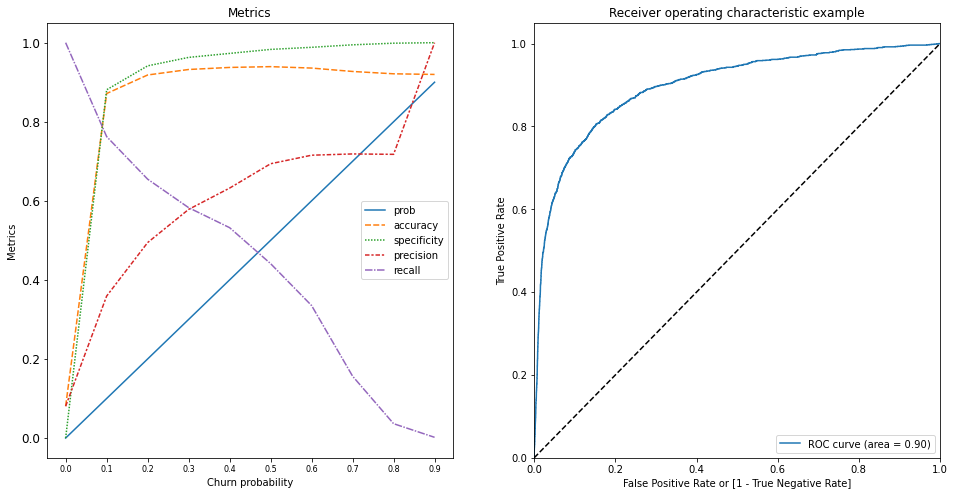

In [121]:
y_train_pred = log_metrics(
    log_model_simple_rfe, X_train_sm_simple_rfe, y_train)

Observation: 

Approx Cutoff = 0.08

In [122]:
cutoff = 0.08
train_pred_logreg = final_y_pred(
    log_model_simple_rfe, X_train_sm_simple_rfe, y_train, cutoff)
train_pred_logreg.head()

,Churn_actual,Churn_pred_prob,final_pred
0,0,0.028838,0
1,0,0.078378,0
2,0,0.017118,0
3,0,0.008664,0
4,0,0.006126,0


Evaluation report data:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     19196
           1       0.32      0.80      0.46      1680

    accuracy                           0.85     20876
   macro avg       0.65      0.83      0.68     20876
weighted avg       0.93      0.85      0.87     20876

Accuracy score   :  0.8471
Specificity score:  0.8513
Precision score  :  0.32
Recall score     :  0.7994
F1 score         :  0.457
Area under curve :  0.8254 



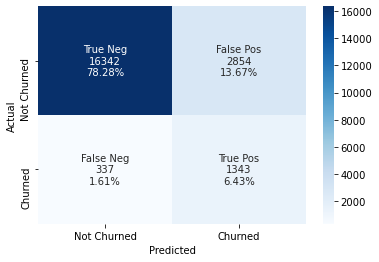

(0.8471, 0.8513, 0.32, 0.7994, 0.457, 0.8254)

In [123]:
model_eval(y_train, train_pred_logreg['final_pred'])

In [124]:
X_test_sm = sm.add_constant(X_test[col])
test_pred_logreg = final_y_pred(
    log_model_simple_rfe, X_test_sm, y_test, cutoff)
test_pred_logreg.head()

,Churn_actual,Churn_pred_prob,final_pred
0,0,0.034027,0
1,0,0.015804,0
2,0,0.027248,0
3,0,0.004090,0
4,0,0.024653,0


Evaluation report data:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8264
           1       0.31      0.84      0.46       684

    accuracy                           0.85      8948
   macro avg       0.65      0.84      0.68      8948
weighted avg       0.93      0.85      0.88      8948

Accuracy score   :  0.8468
Specificity score:  0.8474
Precision score  :  0.3128
Recall score     :  0.8392
F1 score         :  0.4557
Area under curve :  0.8433 



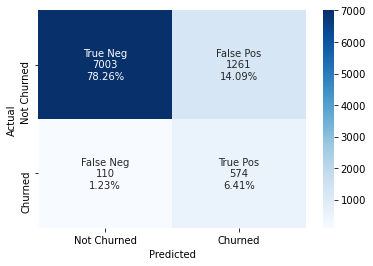

In [125]:
accuracy, specificity, precision, recall, f1, model_roc_auc = model_eval(
    y_test, test_pred_logreg['final_pred'])

In [126]:
temp_df = pd.DataFrame({'Model': ['Logistic Regression on imbalanced data without PCA'],
                        'Accuracy': [accuracy],
                        'Specificity': [specificity],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1 score': [f1],
                        'Area under ROC curve': [model_roc_auc]})
results = pd.concat([results, temp_df])
results = results[['Model', 'Accuracy', 'Specificity',
                   'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

,Model,Accuracy,Specificity,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without PCA,0.8468,0.8474,0.3128,0.8392,0.4557,0.8433


#### 9.1.2 Logistic regression on balanced data (SMOTE technique) without PCA

In [127]:
# Run RFE with 20 features
col = rfe_logreg(X_train_smote, y_train_smote, features=20)
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 20)

In [128]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38371
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14141.
Date:                Wed, 04 May 2022   Deviance:                       28281.
Time:                        07:24:43   Pearson chi2:                 4.71e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.7346      0.050    -34.533      0.000      -1.833      -1.636
fb_user_8                      0.5082      0.090      5.660      0.000       0.332       0.684
total_rech_amt_good            0.3686      0.023     16.266      0.000       0.324       0.413
total_rech_amt_action         -0.3796      0.028    -13.702      0.000      -0.434      -0.325
tenure                        -0.3662      0.019    -19.457      0.000      -0.403      -0.329
spl_ic_mou_action             -0.4668      0.026    -17.649      0.000      -0.519      -0.415
count_rech_3g_action           1.3938      0.171      8.169      0.000       1.059       1.728
vol_3g_mb_action              -0.3608      0.039     -9.225      0.000      -0.437      -0.284
offnet_mou_action             -0.2986      0.025    -11.809      0.000      -0.348      -0.249
monthly_3g_action             -0.8922      0.132     -6.737      0.000      -1.152      -0.633
total_data_rech_amt_action    -0.6627      0.046    -14.437      0.000      -0.753      -0.573
total_ic_mou_good              0.4291      0.028     15.456      0.000       0.375       0.484
total_ic_mou_action           -0.6799      0.058    -11.816      0.000      -0.793      -0.567
roam_og_mou_action             0.5366      0.015     36.729      0.000       0.508       0.565
count_rech_2g_good             0.7432      0.180      4.121      0.000       0.390       1.097
vol_2g_mb_action              -0.3730      0.036    -10.487      0.000      -0.443      -0.303
onnet_mou_action              -0.2290      0.021    -10.752      0.000      -0.271      -0.187
loc_ic_mou_action             -0.5470      0.052    -10.535      0.000      -0.649      -0.445
sachet_2g_good                -0.6059      0.175     -3.464      0.001      -0.949      -0.263
monthly_2g_good               -0.4806      0.076     -6.320      0.000      -0.630      -0.332
sachet_3g_action              -0.8303      0.120     -6.910      0.000      -1.066      -0.595
==============================================================================================
"""

In [129]:
vif_smote_logreg = vif_cal(X_train_smote_logreg)
vif_smote_logreg

,Features,VIF
13,count_rech_2g_good,103.28
17,sachet_2g_good,93.75
5,count_rech_3g_action,42.99
8,monthly_3g_action,23.28
11,total_ic_mou_action,22.83
16,loc_ic_mou_action,19.71
19,sachet_3g_action,18.00
18,monthly_2g_good,13.90
9,total_data_rech_amt_action,6.82
2,total_rech_amt_action,6.09


In [130]:
# removing col because of high vif
col.remove('count_rech_2g_good')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 19)

In [131]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38372
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14149.
Date:                Wed, 04 May 2022   Deviance:                       28299.
Time:                        07:24:44   Pearson chi2:                 4.67e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.7380      0.050    -34.643      0.000      -1.836      -1.640
fb_user_8                      0.5196      0.090      5.796      0.000       0.344       0.695
total_rech_amt_good            0.3667      0.023     16.198      0.000       0.322       0.411
total_rech_amt_action         -0.3814      0.028    -13.774      0.000      -0.436      -0.327
tenure                        -0.3648      0.019    -19.384      0.000      -0.402      -0.328
spl_ic_mou_action             -0.4675      0.026    -17.682      0.000      -0.519      -0.416
count_rech_3g_action           1.3921      0.171      8.151      0.000       1.057       1.727
vol_3g_mb_action              -0.3634      0.039     -9.302      0.000      -0.440      -0.287
offnet_mou_action             -0.2963      0.025    -11.725      0.000      -0.346      -0.247
monthly_3g_action             -0.8975      0.133     -6.771      0.000      -1.157      -0.638
total_data_rech_amt_action    -0.6518      0.046    -14.255      0.000      -0.741      -0.562
total_ic_mou_good              0.4296      0.028     15.479      0.000       0.375       0.484
total_ic_mou_action           -0.6825      0.058    -11.863      0.000      -0.795      -0.570
roam_og_mou_action             0.5363      0.015     36.720      0.000       0.508       0.565
vol_2g_mb_action              -0.3749      0.036    -10.551      0.000      -0.445      -0.305
onnet_mou_action              -0.2291      0.021    -10.761      0.000      -0.271      -0.187
loc_ic_mou_action             -0.5429      0.052    -10.458      0.000      -0.645      -0.441
sachet_2g_good                 0.1094      0.021      5.192      0.000       0.068       0.151
monthly_2g_good               -0.1823      0.022     -8.214      0.000      -0.226      -0.139
sachet_3g_action              -0.8333      0.120     -6.928      0.000      -1.069      -0.598
==============================================================================================
"""

In [132]:
vif_smote_logreg = vif_cal(X_train_smote_logreg)
vif_smote_logreg

,Features,VIF
5,count_rech_3g_action,42.99
8,monthly_3g_action,23.28
11,total_ic_mou_action,22.83
15,loc_ic_mou_action,19.70
18,sachet_3g_action,18.00
9,total_data_rech_amt_action,6.80
2,total_rech_amt_action,6.09
7,offnet_mou_action,4.55
6,vol_3g_mb_action,3.85
13,vol_2g_mb_action,3.18


In [133]:
# removing col because of high vif
col.remove('count_rech_3g_action')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 18)

In [134]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38373
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14190.
Date:                Wed, 04 May 2022   Deviance:                       28381.
Time:                        07:24:46   Pearson chi2:                 4.66e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.7144      0.050    -34.623      0.000      -1.811      -1.617
fb_user_8                      0.5134      0.089      5.764      0.000       0.339       0.688
total_rech_amt_good            0.3740      0.023     16.551      0.000       0.330       0.418
total_rech_amt_action         -0.3797      0.028    -13.718      0.000      -0.434      -0.325
tenure                        -0.3657      0.019    -19.450      0.000      -0.403      -0.329
spl_ic_mou_action             -0.4675      0.026    -17.685      0.000      -0.519      -0.416
vol_3g_mb_action              -0.3411      0.039     -8.777      0.000      -0.417      -0.265
offnet_mou_action             -0.3072      0.025    -12.175      0.000      -0.357      -0.258
monthly_3g_action              0.1333      0.030      4.392      0.000       0.074       0.193
total_data_rech_amt_action    -0.6134      0.045    -13.539      0.000      -0.702      -0.525
total_ic_mou_good              0.4236      0.028     15.281      0.000       0.369       0.478
total_ic_mou_action           -0.6808      0.057    -11.842      0.000      -0.793      -0.568
roam_og_mou_action             0.5360      0.015     36.741      0.000       0.507       0.565
vol_2g_mb_action              -0.3854      0.035    -10.901      0.000      -0.455      -0.316
onnet_mou_action              -0.2313      0.021    -10.883      0.000      -0.273      -0.190
loc_ic_mou_action             -0.5368      0.052    -10.349      0.000      -0.638      -0.435
sachet_2g_good                 0.0966      0.021      4.602      0.000       0.055       0.138
monthly_2g_good               -0.1927      0.022     -8.722      0.000      -0.236      -0.149
sachet_3g_action               0.1047      0.022      4.744      0.000       0.061       0.148
==============================================================================================
"""

In [135]:
vif_smote_logreg = vif_cal(X_train_smote_logreg)
vif_smote_logreg

,Features,VIF
10,total_ic_mou_action,22.83
14,loc_ic_mou_action,19.70
8,total_data_rech_amt_action,6.78
2,total_rech_amt_action,6.09
6,offnet_mou_action,4.55
5,vol_3g_mb_action,3.83
12,vol_2g_mb_action,3.18
13,onnet_mou_action,2.92
9,total_ic_mou_good,2.78
7,monthly_3g_action,2.43


In [136]:
# removing col because of high vif
col.remove('total_ic_mou_action')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 17)

In [137]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38374
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14265.
Date:                Wed, 04 May 2022   Deviance:                       28530.
Time:                        07:24:47   Pearson chi2:                 4.49e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.7021      0.049    -34.437      0.000      -1.799      -1.605
fb_user_8                      0.4857      0.089      5.467      0.000       0.312       0.660
total_rech_amt_good            0.4145      0.022     18.516      0.000       0.371       0.458
total_rech_amt_action         -0.4432      0.027    -16.350      0.000      -0.496      -0.390
tenure                        -0.3535      0.019    -18.914      0.000      -0.390      -0.317
spl_ic_mou_action             -0.4835      0.027    -18.234      0.000      -0.535      -0.432
vol_3g_mb_action              -0.3508      0.039     -9.038      0.000      -0.427      -0.275
offnet_mou_action             -0.3486      0.025    -13.922      0.000      -0.398      -0.300
monthly_3g_action              0.1289      0.030      4.254      0.000       0.069       0.188
total_data_rech_amt_action    -0.5941      0.045    -13.200      0.000      -0.682      -0.506
total_ic_mou_good              0.2867      0.025     11.586      0.000       0.238       0.335
roam_og_mou_action             0.5462      0.014     37.696      0.000       0.518       0.575
vol_2g_mb_action              -0.3941      0.035    -11.168      0.000      -0.463      -0.325
onnet_mou_action              -0.2549      0.021    -12.041      0.000      -0.296      -0.213
loc_ic_mou_action             -1.0254      0.030    -33.845      0.000      -1.085      -0.966
sachet_2g_good                 0.0992      0.021      4.745      0.000       0.058       0.140
monthly_2g_good               -0.1965      0.022     -8.901      0.000      -0.240      -0.153
sachet_3g_action               0.1016      0.022      4.613      0.000       0.058       0.145
==============================================================================================
"""

In [138]:
vif_smote_logreg = vif_cal(X_train_smote_logreg)
vif_smote_logreg

,Features,VIF
8,total_data_rech_amt_action,6.78
2,total_rech_amt_action,5.95
13,loc_ic_mou_action,5.52
6,offnet_mou_action,4.48
5,vol_3g_mb_action,3.82
11,vol_2g_mb_action,3.18
12,onnet_mou_action,2.90
9,total_ic_mou_good,2.52
7,monthly_3g_action,2.43
1,total_rech_amt_good,1.97


In [139]:
# removing col because of high vif
col.remove('total_data_rech_amt_action')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 16)

In [140]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38375
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14357.
Date:                Wed, 04 May 2022   Deviance:                       28715.
Time:                        07:24:48   Pearson chi2:                 4.64e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5013      0.046    -32.597      0.000      -1.592      -1.411
fb_user_8                 0.1160      0.083      1.398      0.162      -0.047       0.279
total_rech_amt_good       0.4215      0.022     18.862      0.000       0.378       0.465
total_rech_amt_action    -0.4913      0.027    -18.245      0.000      -0.544      -0.438
tenure                   -0.3608      0.019    -19.312      0.000      -0.397      -0.324
spl_ic_mou_action        -0.4833      0.026    -18.329      0.000      -0.535      -0.432
vol_3g_mb_action         -0.4965      0.037    -13.396      0.000      -0.569      -0.424
offnet_mou_action        -0.3424      0.025    -13.688      0.000      -0.391      -0.293
monthly_3g_action         0.0421      0.029      1.434      0.151      -0.015       0.100
total_ic_mou_good         0.2966      0.025     11.996      0.000       0.248       0.345
roam_og_mou_action        0.5464      0.014     37.737      0.000       0.518       0.575
vol_2g_mb_action         -0.5251      0.034    -15.566      0.000      -0.591      -0.459
onnet_mou_action         -0.2494      0.021    -11.797      0.000      -0.291      -0.208
loc_ic_mou_action        -1.0333      0.030    -34.129      0.000      -1.093      -0.974
sachet_2g_good            0.0049      0.019      0.253      0.800      -0.033       0.043
monthly_2g_good          -0.1914      0.022     -8.704      0.000      -0.234      -0.148
sachet_3g_action          0.0135      0.021      0.657      0.511      -0.027       0.054
=========================================================================================
"""

In [141]:
# removing col because of high p-value
col.remove('sachet_2g_good')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 15)

In [142]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38376
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14358.
Date:                Wed, 04 May 2022   Deviance:                       28715.
Time:                        07:24:48   Pearson chi2:                 4.63e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5034      0.045    -33.187      0.000      -1.592      -1.415
fb_user_8                 0.1207      0.081      1.493      0.135      -0.038       0.279
total_rech_amt_good       0.4204      0.022     19.163      0.000       0.377       0.463
total_rech_amt_action    -0.4912      0.027    -18.244      0.000      -0.544      -0.438
tenure                   -0.3610      0.019    -19.353      0.000      -0.398      -0.324
spl_ic_mou_action        -0.4832      0.026    -18.327      0.000      -0.535      -0.432
vol_3g_mb_action         -0.4970      0.037    -13.427      0.000      -0.570      -0.424
offnet_mou_action        -0.3427      0.025    -13.725      0.000      -0.392      -0.294
monthly_3g_action         0.0400      0.028      1.420      0.156      -0.015       0.095
total_ic_mou_good         0.2969      0.025     12.027      0.000       0.249       0.345
roam_og_mou_action        0.5464      0.014     37.738      0.000       0.518       0.575
vol_2g_mb_action         -0.5243      0.034    -15.609      0.000      -0.590      -0.458
onnet_mou_action         -0.2498      0.021    -11.844      0.000      -0.291      -0.208
loc_ic_mou_action        -1.0332      0.030    -34.128      0.000      -1.093      -0.974
monthly_2g_good          -0.1927      0.021     -9.047      0.000      -0.235      -0.151
sachet_3g_action          0.0134      0.021      0.653      0.514      -0.027       0.054
=========================================================================================
"""

In [143]:
# removing col because of high p-value
col.remove('sachet_3g_action')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 14)

In [144]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38377
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14358.
Date:                Wed, 04 May 2022   Deviance:                       28715.
Time:                        07:24:48   Pearson chi2:                 4.63e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5063      0.045    -33.410      0.000      -1.595      -1.418
fb_user_8                 0.1274      0.080      1.588      0.112      -0.030       0.285
total_rech_amt_good       0.4206      0.022     19.176      0.000       0.378       0.464
total_rech_amt_action    -0.4910      0.027    -18.237      0.000      -0.544      -0.438
tenure                   -0.3613      0.019    -19.374      0.000      -0.398      -0.325
spl_ic_mou_action        -0.4833      0.026    -18.329      0.000      -0.535      -0.432
vol_3g_mb_action         -0.4906      0.036    -13.750      0.000      -0.561      -0.421
offnet_mou_action        -0.3430      0.025    -13.738      0.000      -0.392      -0.294
monthly_3g_action         0.0337      0.026      1.273      0.203      -0.018       0.085
total_ic_mou_good         0.2968      0.025     12.021      0.000       0.248       0.345
roam_og_mou_action        0.5466      0.014     37.755      0.000       0.518       0.575
vol_2g_mb_action         -0.5243      0.034    -15.609      0.000      -0.590      -0.458
onnet_mou_action         -0.2502      0.021    -11.868      0.000      -0.292      -0.209
loc_ic_mou_action        -1.0328      0.030    -34.125      0.000      -1.092      -0.974
monthly_2g_good          -0.1950      0.021     -9.280      0.000      -0.236      -0.154
=========================================================================================
"""

In [145]:
# removing col because of high p-value
col.remove('monthly_3g_action')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 13)

In [146]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38378
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14359.
Date:                Wed, 04 May 2022   Deviance:                       28717.
Time:                        07:24:49   Pearson chi2:                 4.62e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5038      0.045    -33.406      0.000      -1.592      -1.416
fb_user_8                 0.1227      0.080      1.533      0.125      -0.034       0.280
total_rech_amt_good       0.4230      0.022     19.342      0.000       0.380       0.466
total_rech_amt_action    -0.4871      0.027    -18.207      0.000      -0.540      -0.435
tenure                   -0.3606      0.019    -19.340      0.000      -0.397      -0.324
spl_ic_mou_action        -0.4840      0.026    -18.359      0.000      -0.536      -0.432
vol_3g_mb_action         -0.4679      0.031    -15.196      0.000      -0.528      -0.408
offnet_mou_action        -0.3455      0.025    -13.881      0.000      -0.394      -0.297
total_ic_mou_good         0.2951      0.025     11.968      0.000       0.247       0.343
roam_og_mou_action        0.5469      0.014     37.776      0.000       0.519       0.575
vol_2g_mb_action         -0.5223      0.034    -15.581      0.000      -0.588      -0.457
onnet_mou_action         -0.2526      0.021    -12.031      0.000      -0.294      -0.211
loc_ic_mou_action        -1.0332      0.030    -34.140      0.000      -1.093      -0.974
monthly_2g_good          -0.1992      0.021     -9.603      0.000      -0.240      -0.159
=========================================================================================
"""

In [147]:
# removing col because of high p-value
col.remove('fb_user_8')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 12)

In [148]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38379
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14360.
Date:                Wed, 04 May 2022   Deviance:                       28719.
Time:                        07:24:49   Pearson chi2:                 4.61e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4426      0.020    -70.408      0.000      -1.483      -1.402
total_rech_amt_good       0.4189      0.022     19.314      0.000       0.376       0.461
total_rech_amt_action    -0.4839      0.027    -18.158      0.000      -0.536      -0.432
tenure                   -0.3618      0.019    -19.425      0.000      -0.398      -0.325
spl_ic_mou_action        -0.4837      0.026    -18.347      0.000      -0.535      -0.432
vol_3g_mb_action         -0.4358      0.022    -19.394      0.000      -0.480      -0.392
offnet_mou_action        -0.3469      0.025    -13.950      0.000      -0.396      -0.298
total_ic_mou_good         0.2949      0.025     11.964      0.000       0.247       0.343
roam_og_mou_action        0.5461      0.014     37.755      0.000       0.518       0.574
vol_2g_mb_action         -0.4817      0.021    -23.484      0.000      -0.522      -0.441
onnet_mou_action         -0.2545      0.021    -12.145      0.000      -0.296      -0.213
loc_ic_mou_action        -1.0308      0.030    -34.110      0.000      -1.090      -0.972
monthly_2g_good          -0.2005      0.021     -9.684      0.000      -0.241      -0.160
=========================================================================================
"""

In [149]:
vif_smote_logreg = vif_cal(X_train_smote_logreg)
vif_smote_logreg

,Features,VIF
1,total_rech_amt_action,5.68
10,loc_ic_mou_action,5.48
5,offnet_mou_action,4.42
9,onnet_mou_action,2.86
6,total_ic_mou_good,2.50
0,total_rech_amt_good,1.84
4,vol_3g_mb_action,1.66
8,vol_2g_mb_action,1.64
7,roam_og_mou_action,1.39
11,monthly_2g_good,1.20


In [150]:
# removing col because of high vif
col.remove('total_rech_amt_action')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 11)

In [151]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38380
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14525.
Date:                Wed, 04 May 2022   Deviance:                       29049.
Time:                        07:24:49   Pearson chi2:                 4.66e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4553      0.021    -70.394      0.000      -1.496      -1.415
total_rech_amt_good     0.2698      0.020     13.407      0.000       0.230       0.309
tenure                 -0.3655      0.019    -19.598      0.000      -0.402      -0.329
spl_ic_mou_action      -0.4912      0.026    -18.608      0.000      -0.543      -0.439
vol_3g_mb_action       -0.5918      0.021    -28.027      0.000      -0.633      -0.550
offnet_mou_action      -0.5391      0.022    -23.985      0.000      -0.583      -0.495
total_ic_mou_good       0.4056      0.024     16.934      0.000       0.359       0.453
roam_og_mou_action      0.5347      0.014     37.147      0.000       0.507       0.563
vol_2g_mb_action       -0.5652      0.020    -28.256      0.000      -0.604      -0.526
onnet_mou_action       -0.3928      0.020    -20.133      0.000      -0.431      -0.355
loc_ic_mou_action      -1.1353      0.030    -38.182      0.000      -1.194      -1.077
monthly_2g_good        -0.1888      0.021     -9.076      0.000      -0.230      -0.148
=======================================================================================
"""

In [152]:
vif_smote_logreg = vif_cal(X_train_smote_logreg)
vif_smote_logreg

,Features,VIF
9,loc_ic_mou_action,5.24
4,offnet_mou_action,3.38
8,onnet_mou_action,2.46
5,total_ic_mou_good,2.34
0,total_rech_amt_good,1.66
7,vol_2g_mb_action,1.57
3,vol_3g_mb_action,1.44
6,roam_og_mou_action,1.39
10,monthly_2g_good,1.19
1,tenure,1.17


In [153]:
# removing col because of high vif
col.remove('loc_ic_mou_action')
X_train_smote_logreg = X_train_smote[col]
X_train_smote_logreg.shape

(38392, 10)

In [154]:
log_model_smote, X_train_sm_smote = logreg_model(
    X_train_smote_logreg, y_train_smote)
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38381
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15334.
Date:                Wed, 04 May 2022   Deviance:                       30667.
Time:                        07:24:50   Pearson chi2:                 4.73e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3989      0.020    -68.612      0.000      -1.439      -1.359
total_rech_amt_good     0.4615      0.019     23.751      0.000       0.423       0.500
tenure                 -0.4449      0.018    -25.081      0.000      -0.480      -0.410
spl_ic_mou_action      -0.5362      0.027    -19.868      0.000      -0.589      -0.483
vol_3g_mb_action       -0.7492      0.021    -35.948      0.000      -0.790      -0.708
offnet_mou_action      -0.9731      0.020    -48.152      0.000      -1.013      -0.933
total_ic_mou_good      -0.1975      0.017    -11.654      0.000      -0.231      -0.164
roam_og_mou_action      0.7168      0.014     52.647      0.000       0.690       0.744
vol_2g_mb_action       -0.6874      0.019    -35.273      0.000      -0.726      -0.649
onnet_mou_action       -0.6253      0.019    -33.538      0.000      -0.662      -0.589
monthly_2g_good        -0.2185      0.020    -10.829      0.000      -0.258      -0.179
=======================================================================================
"""

In [155]:
vif_smote_logreg = vif_cal(X_train_smote_logreg)
vif_smote_logreg

,Features,VIF
4,offnet_mou_action,2.48
8,onnet_mou_action,2.21
0,total_rech_amt_good,1.54
7,vol_2g_mb_action,1.51
5,total_ic_mou_good,1.47
3,vol_3g_mb_action,1.38
9,monthly_2g_good,1.19
6,roam_og_mou_action,1.18
1,tenure,1.15
2,spl_ic_mou_action,1.07


Observation: 

Model is stable and all variables have VIF < 5


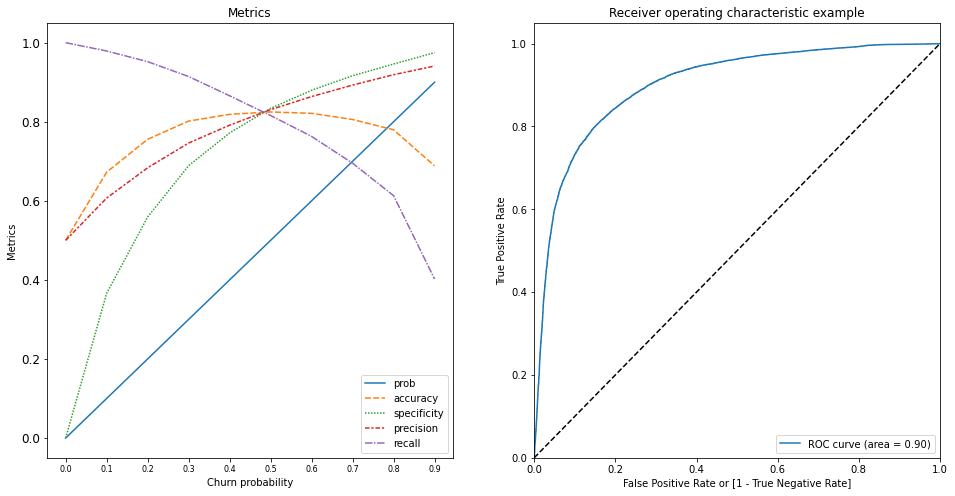

In [156]:
y_train_pred_smote = log_metrics(
    log_model_smote, X_train_sm_smote, y_train_smote)

Observation:

Cutoff = 0.5

In [157]:
cutoff = 0.5
train_pred_logreg_smote = final_y_pred(
    log_model_smote, X_train_sm_smote, y_train_smote, cutoff)
train_pred_logreg_smote.head()

,Churn_actual,Churn_pred_prob,final_pred
0,0,0.354617,0
1,0,0.407074,0
2,0,0.270286,0
3,0,0.171372,0
4,0,0.034618,0


Evaluation report data:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83     19196
           1       0.83      0.82      0.82     19196

    accuracy                           0.82     38392
   macro avg       0.82      0.82      0.82     38392
weighted avg       0.82      0.82      0.82     38392

Accuracy score   :  0.8248
Specificity score:  0.8338
Precision score  :  0.8307
Recall score     :  0.8158
F1 score         :  0.8232
Area under curve :  0.8248 



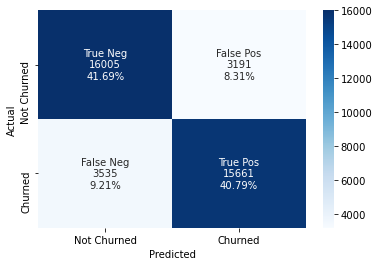

(0.8248, 0.8338, 0.8307, 0.8158, 0.8232, 0.8248)

In [158]:
model_eval(y_train_smote, train_pred_logreg_smote['final_pred'])

In [159]:
X_test_sm = sm.add_constant(X_test[col])
test_pred_logreg_smote = final_y_pred(
    log_model_smote, X_test_sm, y_test, cutoff)
test_pred_logreg_smote.head()

,Churn_actual,Churn_pred_prob,final_pred
0,0,0.332428,0
1,0,0.262993,0
2,0,0.121349,0
3,0,0.031146,0
4,0,0.173757,0


Evaluation report data:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8264
           1       0.29      0.84      0.43       684

    accuracy                           0.83      8948
   macro avg       0.64      0.84      0.67      8948
weighted avg       0.93      0.83      0.87      8948

Accuracy score   :  0.8329
Specificity score:  0.8324
Precision score  :  0.293
Recall score     :  0.8392
F1 score         :  0.4344
Area under curve :  0.8358 



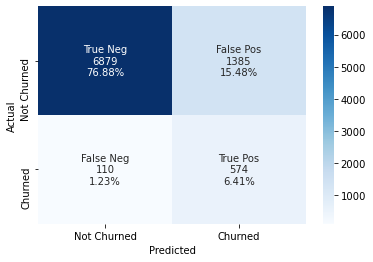

In [160]:
accuracy, specificity, precision, recall, f1, model_roc_auc = model_eval(
    y_test, test_pred_logreg_smote['final_pred'])

In [161]:
temp_df = pd.DataFrame({'Model': ['Logistic Regression on SMOTE balanced data without PCA'],
                        'Accuracy': [accuracy],
                        'Specificity': [specificity],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1 score': [f1],
                        'Area under ROC curve': [model_roc_auc]})
results = pd.concat([results, temp_df])
results = results[['Model', 'Accuracy', 'Specificity',
                   'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

,Model,Accuracy,Specificity,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without PCA,0.8468,0.8474,0.3128,0.8392,0.4557,0.8433
0,Logistic Regression on SMOTE balanced data without PCA,0.8329,0.8324,0.2930,0.8392,0.4344,0.8358


#### 9.1.3 Logistic Regression on SMOTE balanced data with PCA

In [162]:
pca = PCA(0.9, random_state=42)  # using 90% variance as the cutoff
X_train_smote_pca = pca.fit_transform(X_train_smote)
X_train_smote_pca.shape

(38392, 24)

In [163]:
X_test_pca = pca.transform(X_test)

In [164]:
X_train_smote_pca = pd.DataFrame(data=X_train_smote_pca)
X_test_pca = pd.DataFrame(data=X_test_pca)

In [165]:
print("Shape of X train_smote PCA : ", X_train_smote_pca.shape)
print("Shape of Y train_smote PCA : ", y_train_smote.shape)
print("Shape of X test PCA : ", X_test_pca.shape)
print("Shape of Y test PCA : ", y_test.shape)

Shape of X train_smote PCA :  (38392, 24)
Shape of Y train_smote PCA :  (38392,)
Shape of X test PCA :  (8948, 24)
Shape of Y test PCA :  (8948,)


In [166]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

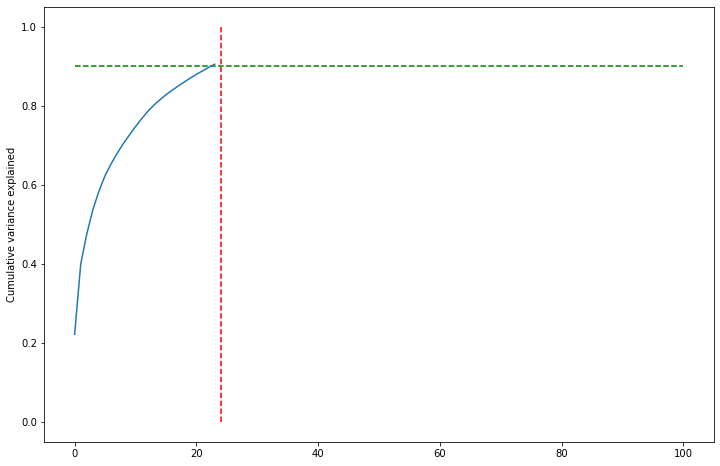

In [167]:
fig = plt.figure(figsize=[12, 8])
plt.vlines(x=24, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles='--')
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

###### Observation:

24 features explain 90% of the variation in the dataset. 

In [168]:
corrmat = np.corrcoef(X_train_smote_pca.transpose())
corrmat.shape

(24, 24)

Plot correlation matrix

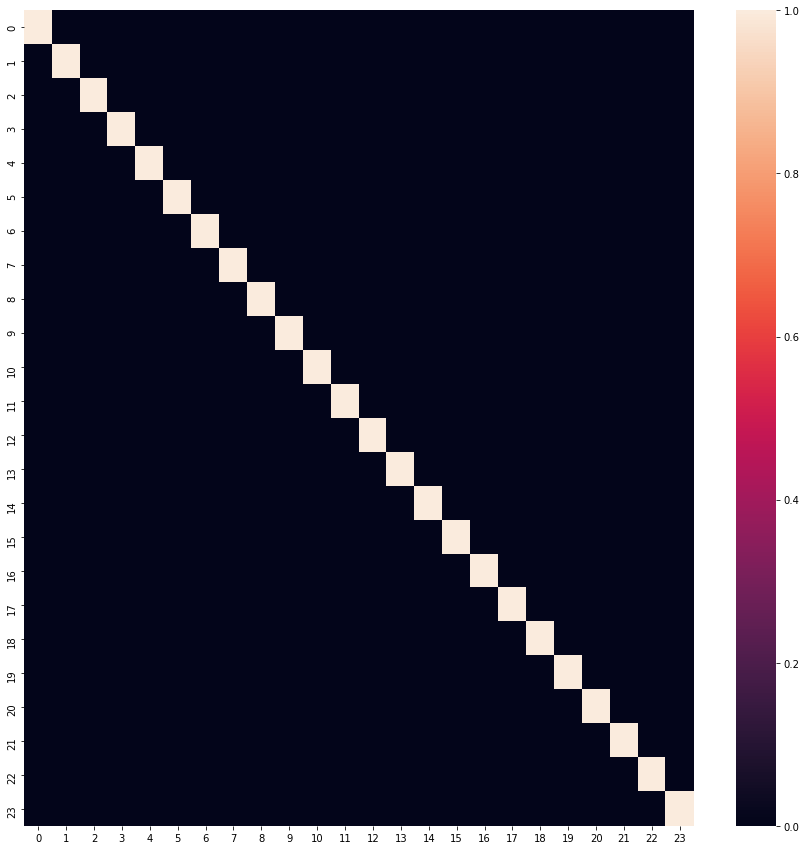

max corr: 1.255159921300543e-15 , min corr:  -9.978046103592493e-16


In [169]:
plt.figure(figsize=[15, 15])
sns.heatmap(corrmat)
plt.show()
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:", corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

Observations: 

The components are internally not correlated

In [170]:
log_model_smote_pca, X_train_smote_pca = logreg_model(
    X_train_smote_pca, y_train_smote.values.ravel())

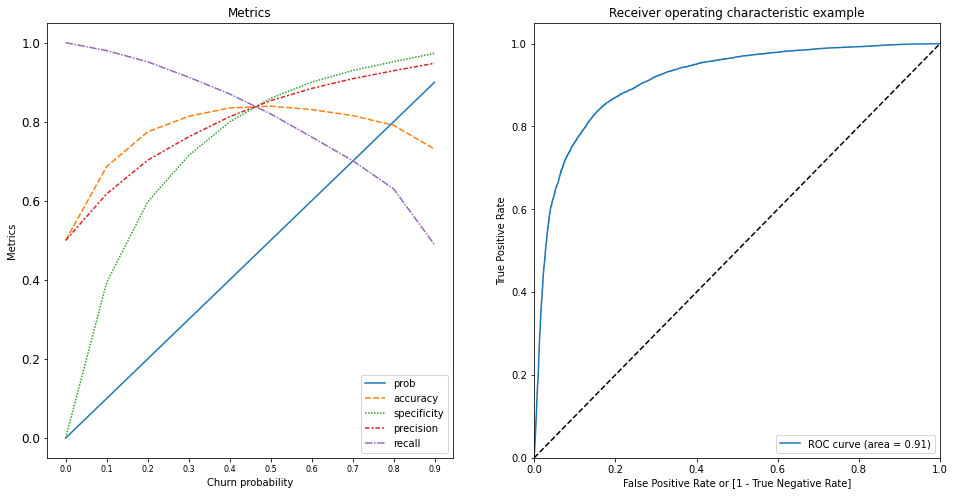

In [171]:
y_train_pred_smote_pca = log_metrics(
    log_model_smote_pca, X_train_smote_pca, y_train_smote)

Observation:

Cutoff = 0.49

In [172]:
cutoff = 0.49
train_pred_smote_pca = final_y_pred(
    log_model_smote_pca, X_train_smote_pca, y_train_smote, cutoff)
train_pred_smote_pca.head()

,Churn_actual,Churn_pred_prob,final_pred
0,0,0.268616,0
1,0,0.384887,0
2,0,0.187075,0
3,0,0.104718,0
4,0,0.037247,0


Evaluation report data:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     19196
           1       0.85      0.83      0.84     19196

    accuracy                           0.84     38392
   macro avg       0.84      0.84      0.84     38392
weighted avg       0.84      0.84      0.84     38392

Accuracy score   :  0.8402
Specificity score:  0.8538
Precision score  :  0.8497
Recall score     :  0.8266
F1 score         :  0.838
Area under curve :  0.8402 



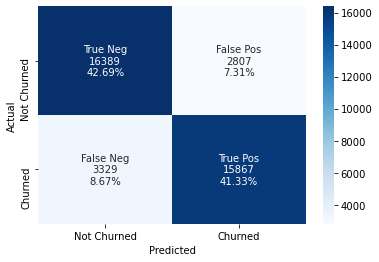

(0.8402, 0.8538, 0.8497, 0.8266, 0.838, 0.8402)

In [173]:
model_eval(y_train_smote, train_pred_smote_pca['final_pred'])

In [174]:
X_test_pca = sm.add_constant(X_test_pca)
test_pred_logreg_smote_pca = final_y_pred(
    log_model_smote_pca, X_test_pca, y_test, cutoff)
test_pred_logreg_smote_pca.head()

,Churn_actual,Churn_pred_prob,final_pred
0,0,0.304321,0
1,0,0.153494,0
2,0,0.075034,0
3,0,0.018023,0
4,0,0.195009,0


Evaluation report data:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8264
           1       0.32      0.83      0.46       684

    accuracy                           0.85      8948
   macro avg       0.65      0.84      0.69      8948
weighted avg       0.93      0.85      0.88      8948

Accuracy score   :  0.8517
Specificity score:  0.8535
Precision score  :  0.3193
Recall score     :  0.8304
F1 score         :  0.4612
Area under curve :  0.8419 



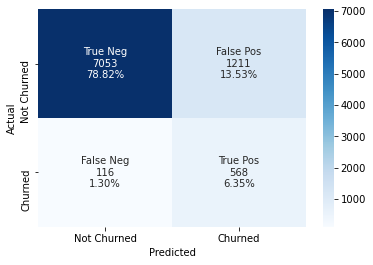

In [175]:
accuracy, specificity, precision, recall, f1, model_roc_auc = model_eval(
    y_test, test_pred_logreg_smote_pca['final_pred'])

In [176]:
temp_df = pd.DataFrame({'Model': ['Logistic Regression on SMOTE balanced data with PCA'],
                        'Accuracy': [accuracy],
                        'Specificity': [specificity],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1 score': [f1],
                        'Area under ROC curve': [model_roc_auc]})
results = pd.concat([results, temp_df])
results = results[['Model', 'Accuracy', 'Specificity',
                   'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

,Model,Accuracy,Specificity,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without PCA,0.8468,0.8474,0.3128,0.8392,0.4557,0.8433
0,Logistic Regression on SMOTE balanced data without PCA,0.8329,0.8324,0.2930,0.8392,0.4344,0.8358
0,Logistic Regression on SMOTE balanced data with PCA,0.8517,0.8535,0.3193,0.8304,0.4612,0.8419


### 9.2 Random Forests

#### 9.2.1 Random forest with SMOTE and default parameters

In [177]:
# Custom function to plot the roc curve
def draw_roc_0_1(model, X, y_true):
    plt.figure(figsize=(5, 5))
    plot_roc_curve(model, X, y_true)
    y_pred = model.predict(X)
    score = roc_auc_score(y_true, y_pred)
    print('='*70)
    print('AUC/ROC score:', score)
    print('='*70)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()

    return None

In [178]:
random_forset_classifier = RandomForestClassifier()
random_forset_classifier.fit(X_train_smote_pca, y_train_smote)

RandomForestClassifier()

In [179]:
rfc_y_train_pred = random_forset_classifier.predict(X_train_smote_pca)
rfc_y_test_pred = random_forset_classifier.predict(X_test_pca)

Evaluation report data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19196
           1       1.00      1.00      1.00     19196

    accuracy                           1.00     38392
   macro avg       1.00      1.00      1.00     38392
weighted avg       1.00      1.00      1.00     38392

Accuracy score   :  1.0
Specificity score:  1.0
Precision score  :  1.0
Recall score     :  1.0
F1 score         :  1.0
Area under curve :  1.0 



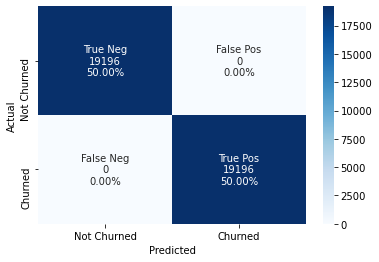

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

In [180]:
model_eval(y_train_smote, rfc_y_train_pred)

AUC/ROC score: 1.0


<Figure size 360x360 with 0 Axes>

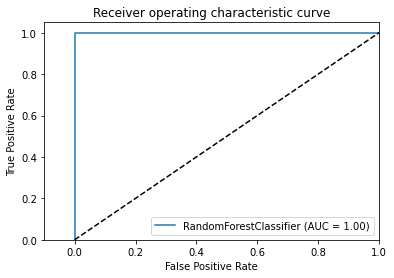

In [181]:
draw_roc_0_1(random_forset_classifier, X_train_smote_pca, y_train_smote)

Evaluation report data:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8264
           1       0.55      0.66      0.60       684

    accuracy                           0.93      8948
   macro avg       0.76      0.81      0.78      8948
weighted avg       0.94      0.93      0.94      8948

Accuracy score   :  0.9321
Specificity score:  0.9543
Precision score  :  0.5457
Recall score     :  0.6637
F1 score         :  0.5989
Area under curve :  0.809 



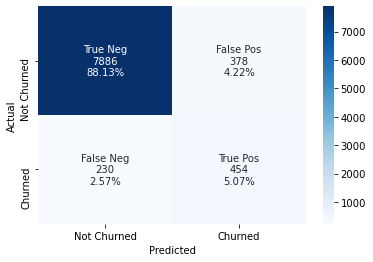

In [182]:
accuracy, specificity, precision, recall, f1, model_roc_auc = model_eval(
    y_test, rfc_y_test_pred)

AUC/ROC score: 0.8090010642935186


<Figure size 360x360 with 0 Axes>

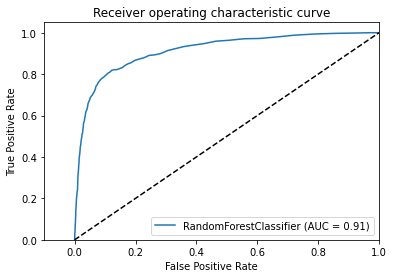

In [183]:
draw_roc_0_1(random_forset_classifier, X_test_pca, y_test)

In [184]:
temp_df = pd.DataFrame({'Model': ['Random forest with SMOTE and default parameters'],
                        'Accuracy': [accuracy],
                        'Specificity': [specificity],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1 score': [f1],
                        'Area under ROC curve': [model_roc_auc]})
results = pd.concat([results, temp_df])
results = results[['Model', 'Accuracy', 'Specificity',
                   'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

,Model,Accuracy,Specificity,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without PCA,0.8468,0.8474,0.3128,0.8392,0.4557,0.8433
0,Logistic Regression on SMOTE balanced data without PCA,0.8329,0.8324,0.2930,0.8392,0.4344,0.8358
0,Logistic Regression on SMOTE balanced data with PCA,0.8517,0.8535,0.3193,0.8304,0.4612,0.8419
0,Random forest with SMOTE and default parameters,0.9321,0.9543,0.5457,0.6637,0.5989,0.8090


#### 9.2.2 Random forests with SMOTE and hyper parameter tuning

In [185]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# Create the parameter grid based on the results of random search

params = {
    'max_depth': [15],
    'min_samples_leaf': [20],
    'max_features': ['auto'],
    'n_estimators': [500],
    'min_samples_split': [200],
    'criterion': ['gini']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params,
                           cv=2, n_jobs=-1, verbose=1)


grid_search.fit(X_train_smote_pca, y_train_smote)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [15],
                         'max_features': ['auto'], 'min_samples_leaf': [20],
                         'min_samples_split': [200], 'n_estimators': [500]},
             verbose=1)

In [186]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=200,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [187]:
random_forset_classifier_tuned = rf_best
random_forset_classifier_tuned.fit(X_train_smote_pca, y_train_smote)

RandomForestClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=200,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [188]:
rfc_y_train_pred = random_forset_classifier_tuned.predict(X_train_smote_pca)

Evaluation report data:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     19196
           1       0.91      0.86      0.88     19196

    accuracy                           0.89     38392
   macro avg       0.89      0.89      0.89     38392
weighted avg       0.89      0.89      0.89     38392

Accuracy score   :  0.8857
Specificity score:  0.9161
Precision score  :  0.9107
Recall score     :  0.8553
F1 score         :  0.8821
Area under curve :  0.8857 



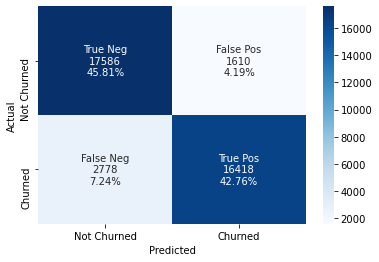

(0.8857, 0.9161, 0.9107, 0.8553, 0.8821, 0.8857)

In [189]:
model_eval(y_train_smote, rfc_y_train_pred)

AUC/ROC score: 0.8857053552823505


<Figure size 360x360 with 0 Axes>

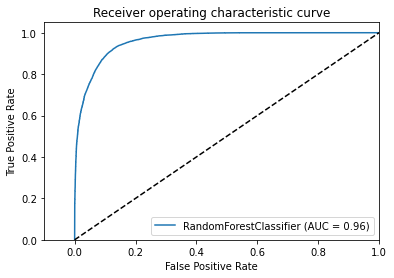

In [190]:
draw_roc_0_1(random_forset_classifier_tuned, X_train_smote_pca, y_train_smote)

In [191]:
rfc_y_test_pred = random_forset_classifier_tuned.predict(X_test_pca)

Evaluation report data:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      8264
           1       0.42      0.78      0.55       684

    accuracy                           0.90      8948
   macro avg       0.70      0.85      0.75      8948
weighted avg       0.94      0.90      0.91      8948

Accuracy score   :  0.9011
Specificity score:  0.9109
Precision score  :  0.4209
Recall score     :  0.7822
F1 score         :  0.5473
Area under curve :  0.8466 



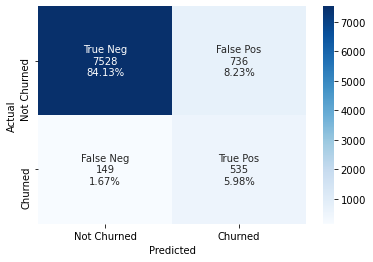

In [192]:
accuracy, specificity, precision, recall, f1, model_roc_auc = model_eval(
    y_test, rfc_y_test_pred)

AUC/ROC score: 0.8465513776373816


<Figure size 360x360 with 0 Axes>

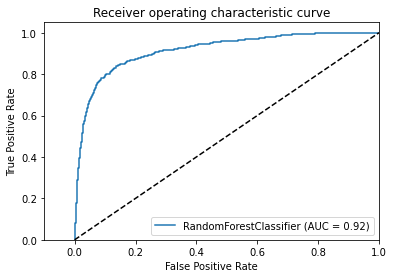

In [193]:
draw_roc_0_1(random_forset_classifier_tuned, X_test_pca, y_test)

In [194]:
temp_df = pd.DataFrame({'Model': ['Random forest with SMOTE and hyperparameters tuned'],
                        'Accuracy': [accuracy],
                        'Specificity': [specificity],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1 score': [f1],
                        'Area under ROC curve': [model_roc_auc]})
results = pd.concat([results, temp_df])
results = results[['Model', 'Accuracy', 'Specificity',
                   'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

,Model,Accuracy,Specificity,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without PCA,0.8468,0.8474,0.3128,0.8392,0.4557,0.8433
0,Logistic Regression on SMOTE balanced data without PCA,0.8329,0.8324,0.2930,0.8392,0.4344,0.8358
0,Logistic Regression on SMOTE balanced data with PCA,0.8517,0.8535,0.3193,0.8304,0.4612,0.8419
0,Random forest with SMOTE and default parameters,0.9321,0.9543,0.5457,0.6637,0.5989,0.8090
0,Random forest with SMOTE and hyperparameters tuned,0.9011,0.9109,0.4209,0.7822,0.5473,0.8466


### 9.3 XGBoost

#### 9.3.1 XGBoost with SMOTE on default parameters

In [195]:
xgclf = XGBClassifier()
xgclf.fit(X_train_smote_pca, y_train_smote)
# score
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_smote,
                                                              y_score=xgclf.predict_proba(X_train_smote_pca)[:, 1]))

AUC on train data by XGBoost = 0.9974781485567706


In [196]:
xgb_y_train_pred = xgclf.predict(X_train_smote_pca)

Evaluation report data:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     19196
           1       0.97      0.99      0.98     19196

    accuracy                           0.98     38392
   macro avg       0.98      0.98      0.98     38392
weighted avg       0.98      0.98      0.98     38392

Accuracy score   :  0.9803
Specificity score:  0.966
Precision score  :  0.9669
Recall score     :  0.9945
F1 score         :  0.9805
Area under curve :  0.9803 



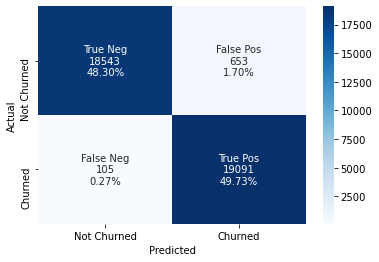

(0.9803, 0.966, 0.9669, 0.9945, 0.9805, 0.9803)

In [197]:
model_eval(y_train_smote, xgb_y_train_pred)

AUC/ROC score: 0.9802563033965409


<Figure size 360x360 with 0 Axes>

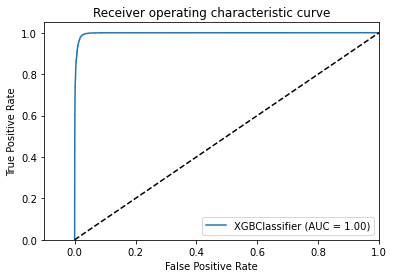

In [198]:
draw_roc_0_1(xgclf, X_train_smote_pca, y_train_smote)

In [199]:
xgb_y_test_pred = xgclf.predict(X_test_pca)

Evaluation report data:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8264
           1       0.44      0.70      0.54       684

    accuracy                           0.91      8948
   macro avg       0.71      0.81      0.74      8948
weighted avg       0.93      0.91      0.92      8948

Accuracy score   :  0.9086
Specificity score:  0.9262
Precision score  :  0.4383
Recall score     :  0.6959
F1 score         :  0.5379
Area under curve :  0.811 



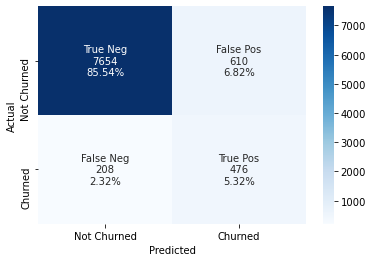

In [200]:
accuracy, specificity, precision, recall, f1, model_roc_auc = model_eval(
    y_test, xgb_y_test_pred)

AUC/ROC score: 0.8110461495785284


<Figure size 360x360 with 0 Axes>

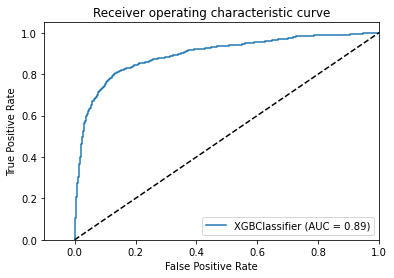

In [201]:
draw_roc_0_1(xgclf, X_test_pca, y_test)

In [202]:
temp_df = pd.DataFrame({'Model': ['XGBoost with SMOTE default parameters'],
                        'Accuracy': [accuracy],
                        'Specificity': [specificity],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1 score': [f1],
                        'Area under ROC curve': [model_roc_auc]})
results = pd.concat([results, temp_df])
results = results[['Model', 'Accuracy', 'Specificity',
                   'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

,Model,Accuracy,Specificity,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without PCA,0.8468,0.8474,0.3128,0.8392,0.4557,0.8433
0,Logistic Regression on SMOTE balanced data without PCA,0.8329,0.8324,0.2930,0.8392,0.4344,0.8358
0,Logistic Regression on SMOTE balanced data with PCA,0.8517,0.8535,0.3193,0.8304,0.4612,0.8419
0,Random forest with SMOTE and default parameters,0.9321,0.9543,0.5457,0.6637,0.5989,0.8090
0,Random forest with SMOTE and hyperparameters tuned,0.9011,0.9109,0.4209,0.7822,0.5473,0.8466
0,XGBoost with SMOTE default parameters,0.9086,0.9262,0.4383,0.6959,0.5379,0.8110


#### 9.3.2 XGBoost with SMOTE and hyperparameter tuning

In [203]:
xgb_model = XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.1],
              'max_depth': [3],
              'min_child_weight': [8],
              'n_estimators': [10]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                       param_grid=parameters,
                       n_jobs=-1,
                       cv=2,
                       scoring=scorer,
                       refit=True)


clf_xgb.fit(X_train_smote_pca, y_train_smote)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [204]:
print(clf_xgb.best_estimator_)
xgboost_best_estimator = clf_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=8,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [205]:
xgclf_best = xgboost_best_estimator
xgclf_best.fit(X_train_smote_pca, y_train_smote)
# score
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_smote,
                                                              y_score=xgclf.predict_proba(X_train_smote_pca)[:, 1]))

AUC on train data by XGBoost = 0.9974781485567706


In [206]:
xgboost_y_train_pred = xgclf_best.predict(X_train_smote_pca)

Evaluation report data:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83     19196
           1       0.89      0.71      0.79     19196

    accuracy                           0.81     38392
   macro avg       0.83      0.81      0.81     38392
weighted avg       0.83      0.81      0.81     38392

Accuracy score   :  0.8132
Specificity score:  0.9131
Precision score  :  0.8914
Recall score     :  0.7133
F1 score         :  0.7925
Area under curve :  0.8132 



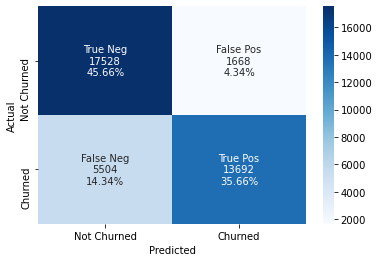

(0.8132, 0.9131, 0.8914, 0.7133, 0.7925, 0.8132)

In [207]:
model_eval(y_train_smote, xgboost_y_train_pred)

AUC/ROC score: 0.8131902479683268


<Figure size 360x360 with 0 Axes>

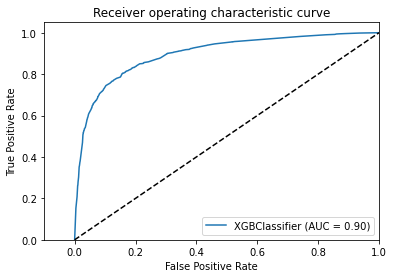

In [208]:
draw_roc_0_1(xgclf_best, X_train_smote_pca, y_train_smote)

In [209]:
xgboost_y_train_pred = xgclf_best.predict(X_test_pca)

Evaluation report data:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      8264
           1       0.40      0.70      0.51       684

    accuracy                           0.90      8948
   macro avg       0.69      0.81      0.72      8948
weighted avg       0.93      0.90      0.91      8948

Accuracy score   :  0.8966
Specificity score:  0.9131
Precision score  :  0.3992
Recall score     :  0.6974
F1 score         :  0.5077
Area under curve :  0.8052 



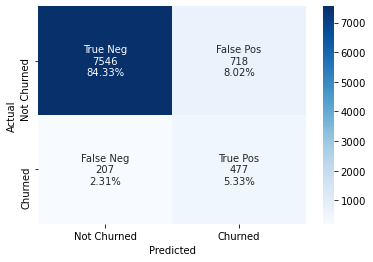

In [210]:
accuracy, specificity, precision, recall, f1, model_roc_auc = model_eval(
    y_test, xgboost_y_train_pred)

AUC/ROC score: 0.8052427778060834


<Figure size 360x360 with 0 Axes>

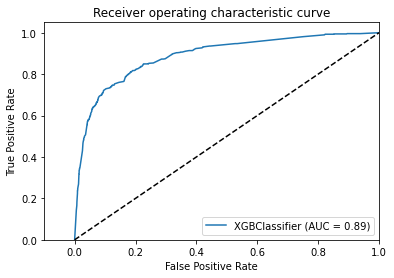

In [211]:
draw_roc_0_1(xgclf_best, X_test_pca, y_test)

In [212]:
temp_df = pd.DataFrame({'Model': ['XGBoost with SMOTE and hyperparameters tuned'],
                        'Accuracy': [accuracy],
                        'Specificity': [specificity],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1 score': [f1],
                        'Area under ROC curve': [model_roc_auc]})
results = pd.concat([results, temp_df])
results = results[['Model', 'Accuracy', 'Specificity',
                   'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

,Model,Accuracy,Specificity,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without PCA,0.8468,0.8474,0.3128,0.8392,0.4557,0.8433
0,Logistic Regression on SMOTE balanced data without PCA,0.8329,0.8324,0.2930,0.8392,0.4344,0.8358
0,Logistic Regression on SMOTE balanced data with PCA,0.8517,0.8535,0.3193,0.8304,0.4612,0.8419
0,Random forest with SMOTE and default parameters,0.9321,0.9543,0.5457,0.6637,0.5989,0.8090
0,Random forest with SMOTE and hyperparameters tuned,0.9011,0.9109,0.4209,0.7822,0.5473,0.8466
0,XGBoost with SMOTE default parameters,0.9086,0.9262,0.4383,0.6959,0.5379,0.8110
0,XGBoost with SMOTE and hyperparameters tuned,0.8966,0.9131,0.3992,0.6974,0.5077,0.8052


## Step 10: Summary

### 10.1 Model finalization

In [213]:
results = results.sort_values("Recall", ascending=False).reset_index(drop=True)
results

,Model,Accuracy,Specificity,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without PCA,0.8468,0.8474,0.3128,0.8392,0.4557,0.8433
1,Logistic Regression on SMOTE balanced data without PCA,0.8329,0.8324,0.2930,0.8392,0.4344,0.8358
2,Logistic Regression on SMOTE balanced data with PCA,0.8517,0.8535,0.3193,0.8304,0.4612,0.8419
3,Random forest with SMOTE and hyperparameters tuned,0.9011,0.9109,0.4209,0.7822,0.5473,0.8466
4,XGBoost with SMOTE and hyperparameters tuned,0.8966,0.9131,0.3992,0.6974,0.5077,0.8052
5,XGBoost with SMOTE default parameters,0.9086,0.9262,0.4383,0.6959,0.5379,0.8110
6,Random forest with SMOTE and default parameters,0.9321,0.9543,0.5457,0.6637,0.5989,0.8090


Logistic Regression on imbalanced data without PCA is the model of choice as it has high Recall and also Explainability. This allows the Telecom company to identify the customers in action phase who might churn and take corrective actions to retain them.

### Step 10.2 Feature importance

In [214]:
log_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38381
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15334.
Date:                Wed, 04 May 2022   Deviance:                       30667.
Time:                        07:26:19   Pearson chi2:                 4.73e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3989      0.020    -68.612      0.000      -1.439      -1.359
total_rech_amt_good     0.4615      0.019     23.751      0.000       0.423       0.500
tenure                 -0.4449      0.018    -25.081      0.000      -0.480      -0.410
spl_ic_mou_action      -0.5362      0.027    -19.868      0.000      -0.589      -0.483
vol_3g_mb_action       -0.7492      0.021    -35.948      0.000      -0.790      -0.708
offnet_mou_action      -0.9731      0.020    -48.152      0.000      -1.013      -0.933
total_ic_mou_good      -0.1975      0.017    -11.654      0.000      -0.231      -0.164
roam_og_mou_action      0.7168      0.014     52.647      0.000       0.690       0.744
vol_2g_mb_action       -0.6874      0.019    -35.273      0.000      -0.726      -0.649
onnet_mou_action       -0.6253      0.019    -33.538      0.000      -0.662      -0.589
monthly_2g_good        -0.2185      0.020    -10.829      0.000      -0.258      -0.179
=======================================================================================
"""

### 10.3 Business recommendations

The following are the indicators of churn:
1. High roaming outgoing calls in the action phase
2. High total amount of recharge in the good phase
3. Low call volume within the network (onnet) or outside network (offnet)  in the action months
4. Low usage of 2g and 3g data in the action months
5. Low special incoming calls in the action months
6. Low tenure on the network (< 20 months)
